#Install Library Pytorch-TabNet

In [ ]:
!pip install pytorch-tabnet --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.8 MB/s eta 0:00:00


In [ ]:
import importlib.metadata
try:
    version = importlib.metadata.version('pytorch-tabnet')
    print(f"PyTorch TabNet version: {version}")
except importlib.metadata.PackageNotFoundError:
    print("PyTorch TabNet is installed, but its version could not be found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

PyTorch TabNet version: 4.1.0


#Load Data

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
# Path to the Excel file in your Google Drive
file_path = '/content/drive/MyDrive/[SEER Part 4] Colorectal Cancer Survival 2018-2022.csv'

# Read the Excel file into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    # Rename the specified column
    df.rename(columns={'Age recode with <1 year olds and 90+': 'Age (15-90+)'}, inplace=True)
    display(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully!


Patient ID Age (15-90+)                  Race recode (White, Black, Other)  \
0        1536  45-49 years  Other (American Indian/AK Native, Asian/Pacifi...   
1        3441  75-79 years                                              White   
2        3868  80-84 years                                              White   
3        4111  80-84 years                                              White   
4        5437  60-64 years                                              White   

      Sex  Year of diagnosis     Marital status at diagnosis  Primary Site  \
0  Female               2019  Married (including common law)           184   
1    Male               2021          Single (never married)           209   
2    Male               2018                         Widowed           186   
3  Female               2019                         Widowed           187   
4  Female               2018                        Divorced           187   

   Histologic Type ICD-O-3 Behavior code ICD-O-3 Diagnostic Confirmation  ...  \
0                     8140             Malignant      Positive histology  ...   
1                     8140             Malignant      Positive histology  ...   
2                     8140             Malignant      Positive histology  ...   
3                     8140             Malignant      Positive histology  ...   
4                     8140             Malignant      Positive histology  ...   

  EOD Regional Nodes Recode (2018+) EOD Mets Recode (2018+)  \
0                               300                       0   
1                               800                       0   
2                               999                       0   
3                                 0                      40   
4                                 0                       0   

  Median household income inflation adj to 2023  \
0                                     $120,000+   
1                                     $120,000+   
2                                     $120,000+   
3                                     $120,000+   
4                                     $120,000+   

                        Rural-Urban Continuum Code  \
0  Counties in metropolitan areas ge 1 million pop   
1  Counties in metropolitan areas ge 1 million pop   
2  Counties in metropolitan areas ge 1 million pop   
3  Counties in metropolitan areas ge 1 million pop   
4  Counties in metropolitan areas ge 1 million pop   

  First malignant primary indicator  \
0                                No   
1                                No   
2                                No   
3                                No   
4                               Yes   

  Derived EOD 2018 Stage Group Recode (2018+)  Grade Pathological (2018+)  \
0                                          3B                           2   
1                                          99                           9   
2                                          99                           9   
3                                          4B                           9   
4                                           1                           2   

  Grade Clinical (2018+) Tumor Size Summary (2016+)  \
0                      9                         27   
1                      1                         40   
2                      1                        999   
3                      2                         50   
4                      9                         22   

  SEER cause-specific death classification  
0             Alive or dead of other cause  
1    Dead (attributable to this cancer dx)  
2             Alive or dead of other cause  
3    Dead (attributable to this cancer dx)  
4             Alive or dead of other cause  

[5 rows x 34 columns]

#Data Preprocessing

## Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54485 entries, 0 to 54484
Data columns (total 34 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Patient ID                                       54485 non-null  int64 
 1   Age (15-90+)                                     54485 non-null  object
 2   Race recode (White, Black, Other)                54485 non-null  object
 3   Sex                                              54485 non-null  object
 4   Year of diagnosis                                54485 non-null  int64 
 5   Marital status at diagnosis                      54485 non-null  object
 6   Primary Site                                     54485 non-null  int64 
 7   Histologic Type ICD-O-3                          54485 non-null  int64 
 8   Behavior code ICD-O-3                            54485 non-null  object
 9   Diagnostic Confirmation                

In [ ]:
import numpy as np

# Replace "Blank(s)" with NaN to treat them as missing values
df.replace(["Blank(s)"], np.nan, inplace=True)

# Check for null values and sum them per column
missing_values = df.isnull().sum()

print("Missing values per column (including 'Blank(s)'):")
display(missing_values)

Missing values per column (including 'Blank(s)'):


Patient ID                                         0
Age (15-90+)                                       0
Race recode (White, Black, Other)                  0
Sex                                                0
Year of diagnosis                                  0
Marital status at diagnosis                        0
Primary Site                                       0
Histologic Type ICD-O-3                            0
Behavior code ICD-O-3                              0
Diagnostic Confirmation                            0
Chemotherapy recode (yes, no/unk)                  0
Radiation recode                                   0
Derived Summary Grade 2018 (2018+)                 0
RX Summ--Surg Prim Site (1998+)                    0
RX Summ--Surg/Rad Seq                              0
Time from diagnosis to treatment in days recode    0
Regional nodes positive (1988+)                    0
SEER Combined Mets at DX-bone (2010+)              0
SEER Combined Mets at DX-liver (2010+)             0
SEER Combined Mets at DX-lung (2010+)              0
Derived EOD 2018 T Recode (2018+)                  0
Derived EOD 2018 N Recode (2018+)                  0
Derived EOD 2018 M Recode (2018+)                  0
EOD Primary Tumor Recode (2018+)                   0
EOD Regional Nodes Recode (2018+)                  0
EOD Mets Recode (2018+)                            0
Median household income inflation adj to 2023      0
Rural-Urban Continuum Code                         0
First malignant primary indicator                  0
Derived EOD 2018 Stage Group Recode (2018+)        0
Grade Pathological (2018+)                         0
Grade Clinical (2018+)                             0
Tumor Size Summary (2016+)                         0
SEER cause-specific death classification           0
dtype: int64

##Duplicate Value

In [ ]:
df.duplicated().sum()

np.int64(0)

##Outlier Value

Checking for outliers in integer columns:


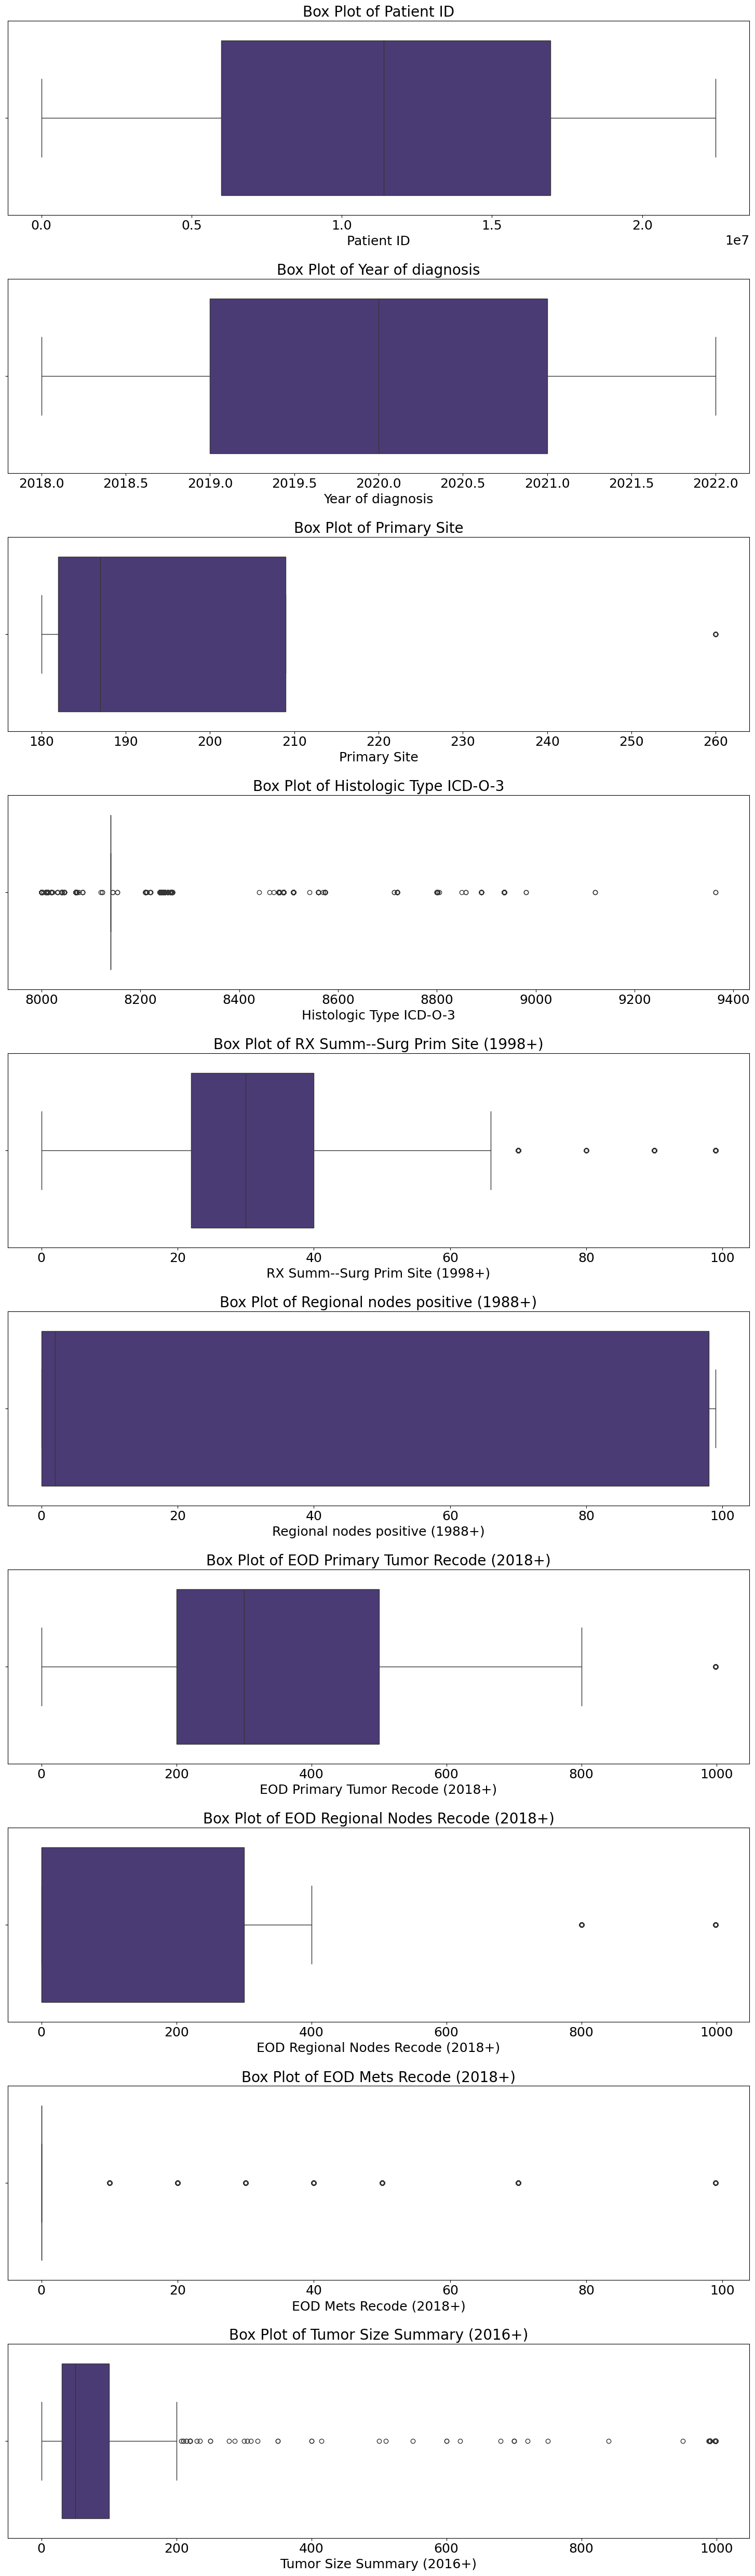

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify columns with integer data type
int_cols = df.select_dtypes(include='int64').columns

print("Checking for outliers in integer columns:")

# Visualize outliers using box plots for integer columns
plt.figure(figsize=(15, 5 * len(int_cols)))
for i, col in enumerate(int_cols):
    plt.subplot(len(int_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Drop non-clinical ID
df = df.drop(columns=['Patient ID'])

# Filter valid colorectal site
df = df[(df['Primary Site'] >= 180) & (df['Primary Site'] <= 209)]

# Filter valid histologic type (epithelial CRC)
df = df[(df['Histologic Type ICD-O-3'] >= 8000) & (df['Histologic Type ICD-O-3'] <= 9000)]

Checking for outliers in integer columns:


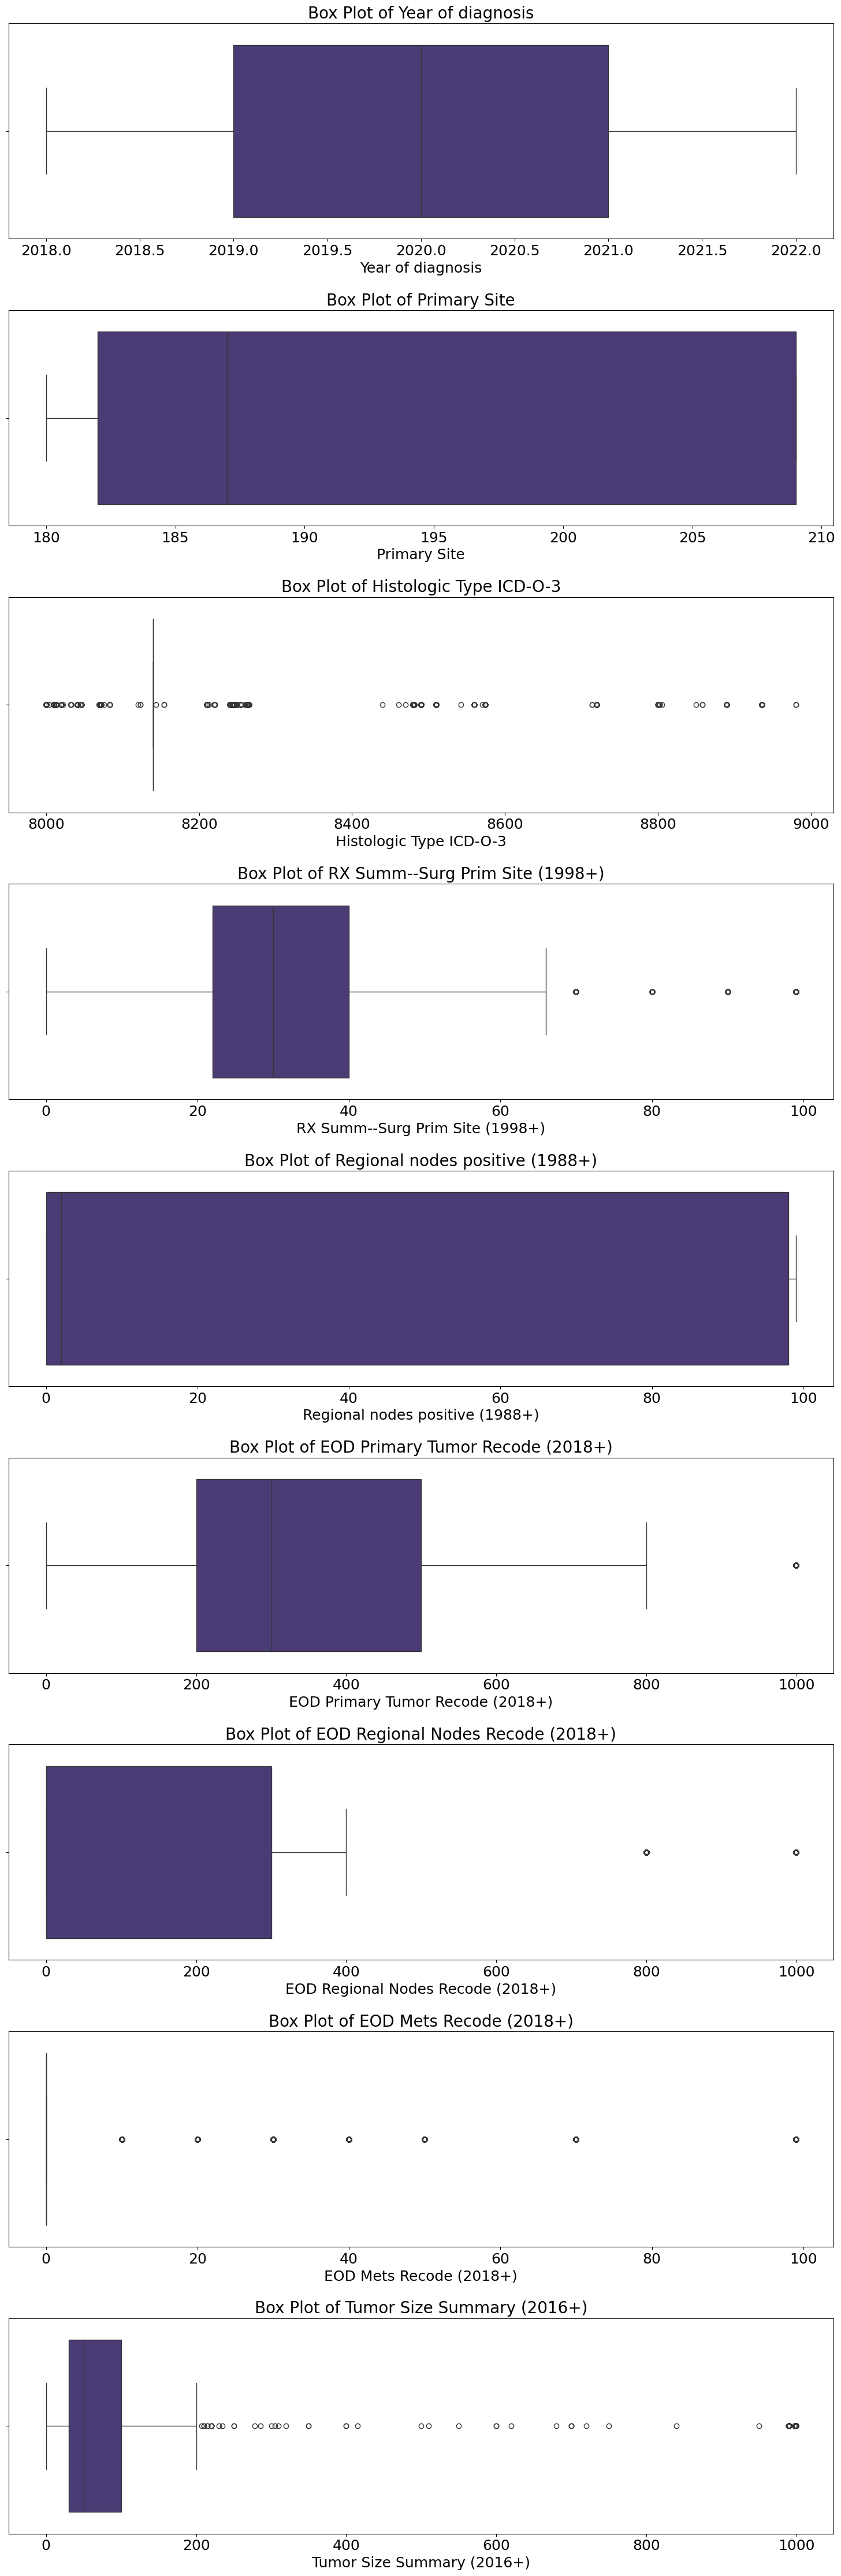

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify columns with integer data type
int_cols = df.select_dtypes(include='int64').columns

print("Checking for outliers in integer columns:")

# Visualize outliers using box plots for integer columns
plt.figure(figsize=(15, 5 * len(int_cols)))
for i, col in enumerate(int_cols):
    plt.subplot(len(int_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54450 entries, 0 to 54484
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Age (15-90+)                                     54450 non-null  object
 1   Race recode (White, Black, Other)                54450 non-null  object
 2   Sex                                              54450 non-null  object
 3   Year of diagnosis                                54450 non-null  int64 
 4   Marital status at diagnosis                      54450 non-null  object
 5   Primary Site                                     54450 non-null  int64 
 6   Histologic Type ICD-O-3                          54450 non-null  int64 
 7   Behavior code ICD-O-3                            54450 non-null  object
 8   Diagnostic Confirmation                          54450 non-null  object
 9   Chemotherapy recode (yes, no/unk)           

In [ ]:
df['Time from diagnosis to treatment in days recode'].unique()

array(['015', '063', 'Unable to calculate', '000', '038', '042', '006',
       '068', '084', '049', '105', '062', '077', '021', '009', '043',
       '020', '041', '146', '051', '013', '033', '082', '092', '037',
       '055', '010', '028', '071', '035', '081', '007', '133', '004',
       '024', '044', '070', '048', '052', '050', '018', '195', '069',
       '111', '001', '003', '017', '047', '022', '089', '012', '170',
       '036', '058', '227', '053', '032', '034', '057', '066', '027',
       '039', '065', '030', '110', '196', '056', '026', '256', '125',
       '054', '005', '008', '040', '098', '064', '011', '060', '153',
       '019', '016', '090', '023', '031', '074', '126', '002', '116',
       '155', '075', '025', '088', '162', '045', '119', '029', '091',
       '073', '117', '086', '141', '061', '102', '112', '083', '014',
       '103', '122', '046', '059', '085', '258', '076', '104', '206',
       '259', '094', '106', '731+ days', '113', '147', '078', '301',
       '177', '151'

In [ ]:
import numpy as np
import pandas as pd

col = 'Time from diagnosis to treatment in days recode'

df[col] = df[col].replace({
    'Unable to calculate': np.nan,
    'Blank(s)': np.nan,
    '731+ days': 731
})

df[col] = pd.to_numeric(df[col], errors='coerce')

print(df[col].describe())
print(df[col].dtype)

count    47093.000000
mean        24.473319
std         34.024577
min          0.000000
25%          0.000000
50%         16.000000
75%         37.000000
max        731.000000
Name: Time from diagnosis to treatment in days recode, dtype: float64
float64


In [ ]:
df.dropna(subset=['Time from diagnosis to treatment in days recode'], inplace=True)

df.isnull().sum()

Age (15-90+)                                       0
Race recode (White, Black, Other)                  0
Sex                                                0
Year of diagnosis                                  0
Marital status at diagnosis                        0
Primary Site                                       0
Histologic Type ICD-O-3                            0
Behavior code ICD-O-3                              0
Diagnostic Confirmation                            0
Chemotherapy recode (yes, no/unk)                  0
Radiation recode                                   0
Derived Summary Grade 2018 (2018+)                 0
RX Summ--Surg Prim Site (1998+)                    0
RX Summ--Surg/Rad Seq                              0
Time from diagnosis to treatment in days recode    0
Regional nodes positive (1988+)                    0
SEER Combined Mets at DX-bone (2010+)              0
SEER Combined Mets at DX-liver (2010+)             0
SEER Combined Mets at DX-lung (2010+)              0
Derived EOD 2018 T Recode (2018+)                  0
Derived EOD 2018 N Recode (2018+)                  0
Derived EOD 2018 M Recode (2018+)                  0
EOD Primary Tumor Recode (2018+)                   0
EOD Regional Nodes Recode (2018+)                  0
EOD Mets Recode (2018+)                            0
Median household income inflation adj to 2023      0
Rural-Urban Continuum Code                         0
First malignant primary indicator                  0
Derived EOD 2018 Stage Group Recode (2018+)        0
Grade Pathological (2018+)                         0
Grade Clinical (2018+)                             0
Tumor Size Summary (2016+)                         0
SEER cause-specific death classification           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47093 entries, 0 to 54483
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age (15-90+)                                     47093 non-null  object 
 1   Race recode (White, Black, Other)                47093 non-null  object 
 2   Sex                                              47093 non-null  object 
 3   Year of diagnosis                                47093 non-null  int64  
 4   Marital status at diagnosis                      47093 non-null  object 
 5   Primary Site                                     47093 non-null  int64  
 6   Histologic Type ICD-O-3                          47093 non-null  int64  
 7   Behavior code ICD-O-3                            47093 non-null  object 
 8   Diagnostic Confirmation                          47093 non-null  object 
 9   Chemotherapy recode (yes, no/unk)

##Imbalance Data Check

In [ ]:
# Remove rows where the target variable is "Dead (missing/unknown COD)"
df = df[df['SEER cause-specific death classification'] != 'Dead (missing/unknown COD)'].copy()

print("Rows with 'Dead (missing/unknown COD)' in the target column removed.")
display(df['SEER cause-specific death classification'].value_counts())

Rows with 'Dead (missing/unknown COD)' in the target column removed.


SEER cause-specific death classification
Alive or dead of other cause             39179
Dead (attributable to this cancer dx)     7745
Name: count, dtype: int64

Proportion of the target variable:


SEER cause-specific death classification
Alive or dead of other cause             0.834946
Dead (attributable to this cancer dx)    0.165054
Name: proportion, dtype: float64

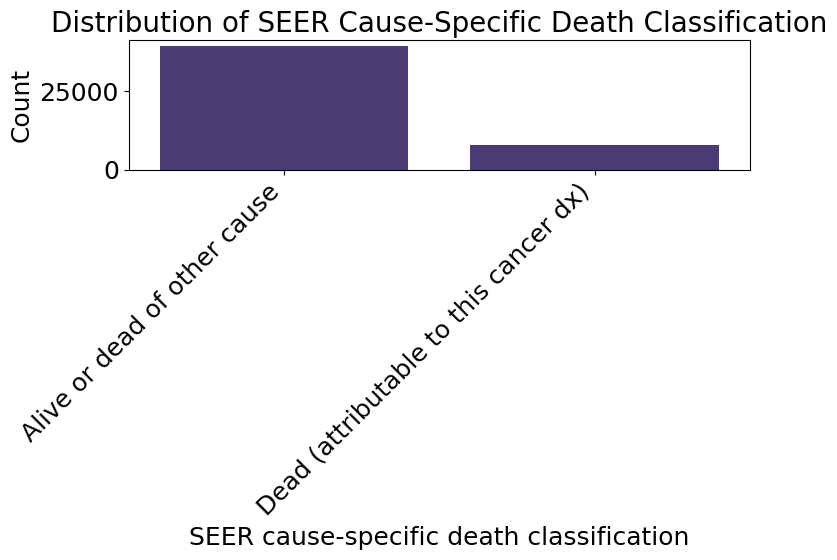

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the proportion of the target variable
target_proportions = df['SEER cause-specific death classification'].value_counts(normalize=True)
print("Proportion of the target variable:")
display(target_proportions)

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='SEER cause-specific death classification', data=df)
plt.title('Distribution of SEER Cause-Specific Death Classification')
plt.xlabel('SEER cause-specific death classification')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46924 entries, 0 to 54483
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age (15-90+)                                     46924 non-null  object 
 1   Race recode (White, Black, Other)                46924 non-null  object 
 2   Sex                                              46924 non-null  object 
 3   Year of diagnosis                                46924 non-null  int64  
 4   Marital status at diagnosis                      46924 non-null  object 
 5   Primary Site                                     46924 non-null  int64  
 6   Histologic Type ICD-O-3                          46924 non-null  int64  
 7   Behavior code ICD-O-3                            46924 non-null  object 
 8   Diagnostic Confirmation                          46924 non-null  object 
 9   Chemotherapy recode (yes, no/unk)

##Label Encoding

In [ ]:
import pandas as pd

# =========================
# Mapping Label Encoding
# =========================

label_mappings = {
    'Age (15-90+)': {
        '15-19 years': 0, '20-24 years': 1, '25-29 years': 2, '30-34 years': 3,
        '35-39 years': 4, '40-44 years': 5, '45-49 years': 6, '50-54 years': 7,
        '55-59 years': 8, '60-64 years': 9, '65-69 years': 10, '70-74 years': 11,
        '75-79 years': 12, '80-84 years': 13, '85-89 years': 14, '90+ years': 15
    },

    'Race recode (White, Black, Other)': {
        'White': 0, 'Black': 1, 'Other (American Indian/AK Native, Asian/Pacific Islander)': 2, 'Unknown': 3
    },

    'Sex': {'Female': 0, 'Male': 1},

    'Marital status at diagnosis': {
        'Single (never married)': 0, 'Married (including common law)': 1,
        'Unmarried or Domestic Partner': 2, 'Divorced': 3, 'Separated': 4,
        'Widowed': 5, 'Unknown': 6
    },

    'Behavior code ICD-O-3': {'Malignant': 0},

    'Diagnostic Confirmation': {
        'Positive histology': 0, 'Positive microscopic confirm, method not specified': 1,
        'Direct visualization without microscopic confirmation': 2,
        'Positive exfoliative cytology, no positive histology': 3,
        'Positive laboratory test/marker study': 4,
        'Clinical diagnosis only': 5, 'Radiography without microscopic confirm': 6,
        'Unknown': 7
    },

    'Chemotherapy recode (yes, no/unk)': {'No/Unknown': 0, 'Yes': 1},

    'Radiation recode': {
        'None/Unknown': 0, 'Beam radiation': 1,
        'Combination of beam with implants or isotopes': 2,
        'Radioactive implants (includes brachytherapy) (1988+)': 3,
        'Radioisotopes (1988+)': 4,
        'Radiation, NOS  method or source not specified': 5,
        'Recommended, unknown if administered': 6,
        'Refused (1988+)': 7
    },

    'Derived Summary Grade 2018 (2018+)': {
        '1': 0, '2': 1, '3': 2, '4': 3, '9': 4, 'A': 5, 'B': 6, 'C': 7, 'D': 8, 'H': 9, 'L': 10
    },

    'RX Summ--Surg/Rad Seq': {
        'No radiation and/or no surgery; unknown if surgery and/or radiation given': 0,
        'Radiation prior to surgery': 1,
        'Radiation after surgery': 2,
        'Radiation before and after surgery': 3,
        'Intraoperative radiation': 4,
        'Intraoperative rad with other rad before/after surgery': 5,
        'Surgery both before and after radiation': 6,
        'Sequence unknown, but both were given': 7
    },

    'SEER Combined Mets at DX-bone (2010+)': {'No': 0, 'Yes': 1, 'Unknown': 2},
    'SEER Combined Mets at DX-liver (2010+)': {'No': 0, 'Yes': 1, 'Unknown': 2},
    'SEER Combined Mets at DX-lung (2010+)': {'No': 0, 'Yes': 1, 'Unknown': 2},

    'Derived EOD 2018 T Recode (2018+)': {
        'Tis': 0, 'Tis(LAMN)': 1, 'T0': 2, 'T1': 3, 'T1a': 4, 'T1b': 5,
        'T2': 6, 'T2b': 7, 'T3': 8, 'T4': 9, 'T4a': 10, 'T4b': 11, 'TX': 12,
        '88': 13
    },

    'Derived EOD 2018 N Recode (2018+)': {
        'N0': 0, 'N1': 1, 'N1a': 2, 'N1b': 3, 'N1c': 4,
        'N2': 5, 'N2a': 6, 'N2b': 7, 'NX': 8, '88': 9
    },

    'Derived EOD 2018 M Recode (2018+)': {
        'M0': 0, 'M1': 1, 'M1a': 2, 'M1b': 3, 'M1c': 4, '88': 5
    },

    'Median household income inflation adj to 2023': {
        '< $40,000': 0, '$40,000 - $44,999': 1, '$45,000 - $49,999': 2,
        '$50,000 - $54,999': 3, '$55,000 - $59,999': 4, '$60,000 - $64,999': 5,
        '$65,000 - $69,999': 6, '$70,000 - $74,999': 7, '$75,000 - $79,999': 8,
        '$80,000 - $84,999': 9, '$85,000 - $89,999': 10, '$90,000 - $94,999': 11,
        '$95,000 - $99,999': 12, '$100,000 - $109,999': 13, '$110,000 - $119,999': 14,
        '$120,000+': 15, 'Unknown/missing/no match/Not 1990-2023': 16
    },

    'Rural-Urban Continuum Code': {
        'Counties in metropolitan areas ge 1 million pop': 0,
        'Counties in metropolitan areas of 250,000 to 1 million pop': 1,
        'Counties in metropolitan areas of lt 250 thousand pop': 2,
        'Nonmetropolitan counties adjacent to a metropolitan area': 3,
        'Nonmetropolitan counties not adjacent to a metropolitan area': 4,
        'Unknown/missing/no match/Not 1990-2023': 5
    },

    'First malignant primary indicator': {'No': 0, 'Yes': 1},

    'Derived EOD 2018 Stage Group Recode (2018+)': {
        '0': 0, '1': 1, '2': 2, '2A': 3, '2B': 4, '2C': 5,
        '3': 6, '3A': 7, '3B': 8, '3C': 9,
        '4': 10, '4A': 11, '4B': 12, '4C': 13,
        '88': 14, '99': 15
    },

    'Grade Pathological (2018+)': {
        '1': 0, '2': 1, '3': 2, '4': 3, '9': 4, 'A': 5, 'B': 6, 'C': 7, 'D': 8, 'H': 9, 'L': 10
    },

    'Grade Clinical (2018+)': {
        '1': 0, '2': 1, '3': 2, '4': 3, '9': 4, 'A': 5, 'B': 6, 'C': 7, 'D': 8, 'H': 9, 'L': 10
    },

    # ⚠️ Target Variable: Alive = 1, Dead = 0
    'SEER cause-specific death classification': {
        'Dead (attributable to this cancer dx)': 0,
        'Alive or dead of other cause': 1
    }
}

# =========================
# Apply Encoding
# =========================

for col, mapping in label_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)
        print(f"✅ Encoded {col}")

# Check result
df.head()

✅ Encoded Age (15-90+)
✅ Encoded Race recode (White, Black, Other)
✅ Encoded Sex
✅ Encoded Marital status at diagnosis
✅ Encoded Behavior code ICD-O-3
✅ Encoded Diagnostic Confirmation
✅ Encoded Chemotherapy recode (yes, no/unk)
✅ Encoded Radiation recode
✅ Encoded Derived Summary Grade 2018 (2018+)
✅ Encoded RX Summ--Surg/Rad Seq
✅ Encoded SEER Combined Mets at DX-bone (2010+)
✅ Encoded SEER Combined Mets at DX-liver (2010+)
✅ Encoded SEER Combined Mets at DX-lung (2010+)
✅ Encoded Derived EOD 2018 T Recode (2018+)
✅ Encoded Derived EOD 2018 N Recode (2018+)
✅ Encoded Derived EOD 2018 M Recode (2018+)
✅ Encoded Median household income inflation adj to 2023
✅ Encoded Rural-Urban Continuum Code
✅ Encoded First malignant primary indicator
✅ Encoded Derived EOD 2018 Stage Group Recode (2018+)
✅ Encoded Grade Pathological (2018+)
✅ Encoded Grade Clinical (2018+)
✅ Encoded SEER cause-specific death classification


Age (15-90+)  Race recode (White, Black, Other)  Sex  Year of diagnosis  \
0             6                                  2    0               2019   
1            12                                  0    1               2021   
4             9                                  0    0               2018   
7             9                                  2    0               2019   
8            13                                  0    1               2020   

   Marital status at diagnosis  Primary Site  Histologic Type ICD-O-3  \
0                            1           184                     8140   
1                            0           209                     8140   
4                            3           187                     8140   
7                            6           209                     8140   
8                            1           209                     8140   

   Behavior code ICD-O-3  Diagnostic Confirmation  \
0                      0                        0   
1                      0                        0   
4                      0                        0   
7                      0                        0   
8                      0                        0   

   Chemotherapy recode (yes, no/unk)  ...  EOD Regional Nodes Recode (2018+)  \
0                                  1  ...                                300   
1                                  0  ...                                800   
4                                  0  ...                                  0   
7                                  1  ...                                  0   
8                                  0  ...                                  0   

   EOD Mets Recode (2018+)  Median household income inflation adj to 2023  \
0                        0                                             15   
1                        0                                             15   
4                        0                                             15   
7                        0                                             15   
8                        0                                             15   

   Rural-Urban Continuum Code  First malignant primary indicator  \
0                           0                                  0   
1                           0                                  0   
4                           0                                  1   
7                           0                                  0   
8                           0                                  0   

   Derived EOD 2018 Stage Group Recode (2018+)  Grade Pathological (2018+)  \
0                                            8                           1   
1                                           15                           4   
4                                            1                           1   
7                                            3                           1   
8                                            1                           4   

   Grade Clinical (2018+)  Tumor Size Summary (2016+)  \
0                       4                          27   
1                       0                          40   
4                       4                          22   
7                       1                          28   
8                       1                          10   

   SEER cause-specific death classification  
0                                         1  
1                                         0  
4                                         1  
7                                         1  
8                                         1  

[5 rows x 33 columns]


#Train-Validation-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming your target variable is 'SEER cause-specific death classification'
X = df.drop('SEER cause-specific death classification', axis=1)
y = df['SEER cause-specific death classification']

# Combine X and y to easily drop rows with NaN in either
df_combined = pd.concat([X, y], axis=1)

# Drop rows with any NaN values
df_combined.dropna(inplace=True)

# Separate X and y again
X = df_combined.drop('SEER cause-specific death classification', axis=1)
y = df_combined['SEER cause-specific death classification']

print("Rows with missing values dropped from both features and target.")
print(f"Shape after dropping NaNs: {df_combined.shape}")

# Split data into training and a temporary set (for validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

print("\nData split into training, validation, and test sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

# Define the directory to save the files
save_dir = '/content/drive/MyDrive/Colorectal_Cancer_Survival_Data_Split/'

# Create the directory if it doesn't exist
import os
os.makedirs(save_dir, exist_ok=True)

# Save the split data to CSV files
X_train.to_csv(os.path.join(save_dir, 'X_train.csv'), index=False)
y_train.to_csv(os.path.join(save_dir, 'y_train.csv'), index=False)
X_val.to_csv(os.path.join(save_dir, 'X_val.csv'), index=False)
y_val.to_csv(os.path.join(save_dir, 'y_val.csv'), index=False)
X_test.to_csv(os.path.join(save_dir, 'X_test.csv'), index=False)
y_test.to_csv(os.path.join(save_dir, 'y_test.csv'), index=False)

print(f"\nSplit data saved to: {save_dir}")

In [ ]:
# Load the split data from CSV files
save_dir = '/content/drive/MyDrive/SEER CRC DATASET/'
import os
os.makedirs(save_dir, exist_ok=True)

X_train = pd.read_csv(os.path.join(save_dir, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(save_dir, 'y_train.csv')).squeeze() # .squeeze() to convert DataFrame to Series
X_val = pd.read_csv(os.path.join(save_dir, 'X_val.csv'))
y_val = pd.read_csv(os.path.join(save_dir, 'y_val.csv')).squeeze()
X_test = pd.read_csv(os.path.join(save_dir, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(save_dir, 'y_test.csv')).squeeze()

print("Split data loaded successfully from Google Drive.")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Split data loaded successfully from Google Drive.
Training set shape: (32846, 32), (32846,)
Validation set shape: (4692, 32), (4692,)
Test set shape: (9386, 32), (9386,)


# Hyperparameter Tuning for TabNet

🚀 Training Final Model with Specified Hyperparameters...


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.66803 | val_0_auc: 0.47364 |  0:00:02s
epoch 1  | loss: 0.47733 | val_0_auc: 0.50686 |  0:00:04s
epoch 2  | loss: 0.44932 | val_0_auc: 0.61276 |  0:00:05s
epoch 3  | loss: 0.4297  | val_0_auc: 0.63669 |  0:00:07s
epoch 4  | loss: 0.40906 | val_0_auc: 0.64031 |  0:00:08s
epoch 5  | loss: 0.3987  | val_0_auc: 0.51582 |  0:00:10s
epoch 6  | loss: 0.38992 | val_0_auc: 0.51062 |  0:00:12s
epoch 7  | loss: 0.38588 | val_0_auc: 0.4883  |  0:00:13s
epoch 8  | loss: 0.38179 | val_0_auc: 0.41201 |  0:00:15s
epoch 9  | loss: 0.3781  | val_0_auc: 0.50571 |  0:00:16s
epoch 10 | loss: 0.37277 | val_0_auc: 0.4377  |  0:00:17s
epoch 11 | loss: 0.3712  | val_0_auc: 0.56247 |  0:00:20s
epoch 12 | loss: 0.36834 | val_0_auc: 0.43055 |  0:00:22s
epoch 13 | loss: 0.36623 | val_0_auc: 0.31149 |  0:00:24s
epoch 14 | loss: 0.36289 | val_0_auc: 0.3175  |  0:00:26s
epoch 15 | loss: 0.36397 | val_0_auc: 0.41699 |  0:00:27s
epoch 16 | loss: 0.36326 | val_0_auc: 0.59884 |  0:00:29s
epoch 17 | los

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



🧪 Evaluating Tuned Final Model on TEST SET...

✅ Final Test Metrics (Macro) with Tuned Hyperparameters:
Accuracy : 0.8625
Precision (Macro): 0.6361
Recall (Macro)   : 0.7242
F1-Score (Macro) : 0.6626
ROC-AUC          : 0.8493

📋 Classification Report (TEST SET):
              precision    recall  f1-score   support

           0     0.3152    0.5583    0.4029      1630
           1     0.9570    0.8901    0.9223     17985

    accuracy                         0.8625     19615
   macro avg     0.6361    0.7242    0.6626     19615
weighted avg     0.9036    0.8625    0.8791     19615



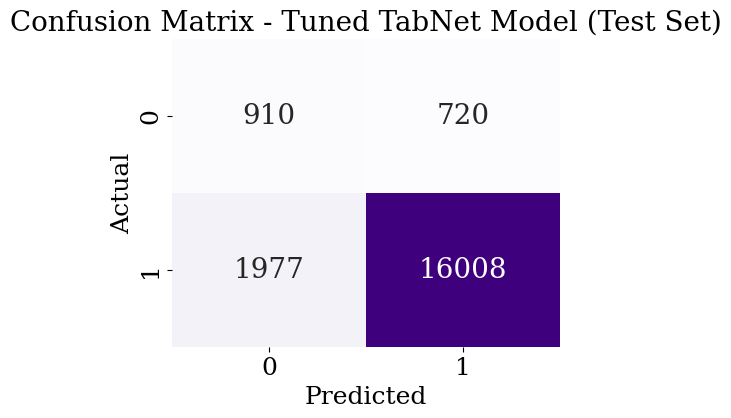


📈 ROC Curve (TEST SET):


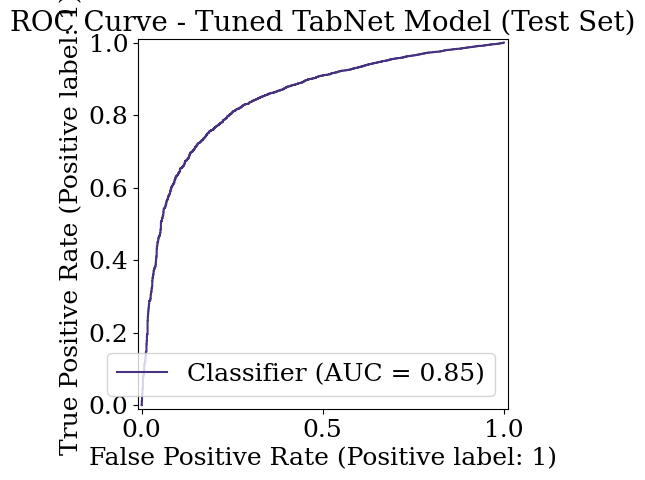

In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, confusion_matrix,
    precision_score, recall_score, f1_score, RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

best_params = {
    'n_steps': 6,
    'n_d': 16,
    'n_a': 10,
    'lr': 0.008858667904100823,
    'lambda_sparse': 0.00014873521072935117,
    'gamma': 1.0
}

# Assuming X_train_resampled_ENN and y_train_resampled_ENN are the resampled training data
# and X_test, y_test are the test data
X_train_np, y_train_np = X_train.values, y_train.values
X_test_np, y_test_np = X_test.values, y_test.values

print("🚀 Training Final Model with Specified Hyperparameters...")
final_model_tuned = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=best_params['lr']),
    scheduler_params={"step_size": 50, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    seed=42,
    verbose=1
)

final_model_tuned.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val.values, y_val.values)], # Use original validation set for evaluation during training
    max_epochs=200,  # Increased epochs for potentially better convergence
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# === Evaluate on Test Set ===
print("\n🧪 Evaluating Tuned Final Model on TEST SET...")
y_pred_test = final_model_tuned.predict(X_test_np)
y_proba_test = final_model_tuned.predict_proba(X_test_np)[:, 1]

# Calculate and display metrics
acc = accuracy_score(y_test_np, y_pred_test)
prec = precision_score(y_test_np, y_pred_test, average='macro', zero_division=0)
rec = recall_score(y_test_np, y_pred_test, average='macro', zero_division=0)
f1 = f1_score(y_test_np, y_pred_test, average='macro', zero_division=0)
auc = roc_auc_score(y_test_np, y_proba_test)

print(f"\n✅ Final Test Metrics (Macro) with Tuned Hyperparameters:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision (Macro): {prec:.4f}")
print(f"Recall (Macro)   : {rec:.4f}")
print(f"F1-Score (Macro) : {f1:.4f}")
print(f"ROC-AUC          : {auc:.4f}")

# Classification Report
print("\n📋 Classification Report (TEST SET):")
print(classification_report(y_test_np, y_pred_test, digits=4, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test_np, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Tuned TabNet Model (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
print("\n📈 ROC Curve (TEST SET):")
RocCurveDisplay.from_predictions(y_test_np, y_proba_test)
plt.title("ROC Curve - Tuned TabNet Model (Test Set)")
plt.show()


🧩 Evaluating Tuned Model on VALIDATION SET...

✅ Validation Metrics (Macro) with Tuned Hyperparameters:
Accuracy : 0.8570
Precision (Macro): 0.7777
Recall (Macro)   : 0.7528
F1-Score (Macro) : 0.7640
ROC-AUC          : 0.8694

📋 Classification Report (VALIDATION SET):
              precision    recall  f1-score   support

           0     0.6557    0.5807    0.6159      1686
           1     0.8997    0.9250    0.9122      6853

    accuracy                         0.8570      8539
   macro avg     0.7777    0.7528    0.7640      8539
weighted avg     0.8515    0.8570    0.8537      8539



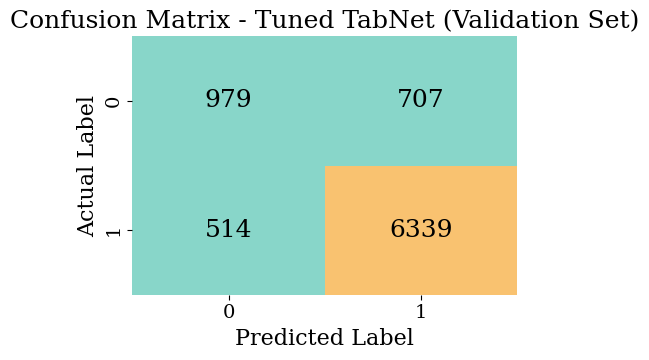


📈 ROC Curve (VALIDATION SET):


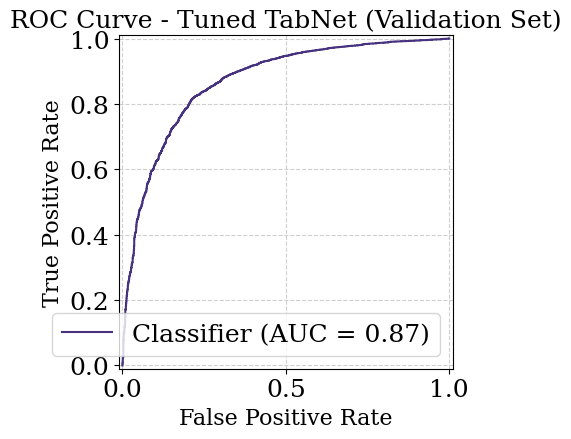

In [ ]:
# ============================================================
# 📊 VALIDATION EVALUATION - Tuned TabNet Model
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)

# === Evaluasi pada Validation Set ===
print("\n🧩 Evaluating Tuned Model on VALIDATION SET...")

# Prediksi pada validation set
y_val_pred = final_model_tuned.predict(X_val.values)
y_val_proba = final_model_tuned.predict_proba(X_val.values)[:, 1]

# Hitung semua metrik validasi
acc_val = accuracy_score(y_val, y_val_pred)
prec_val = precision_score(y_val, y_val_pred, average='macro', zero_division=0)
rec_val = recall_score(y_val, y_val_pred, average='macro', zero_division=0)
f1_val = f1_score(y_val, y_val_pred, average='macro', zero_division=0)
auc_val = roc_auc_score(y_val, y_val_proba)

# === Print hasilnya ===
print(f"\n✅ Validation Metrics (Macro) with Tuned Hyperparameters:")
print(f"Accuracy : {acc_val:.4f}")
print(f"Precision (Macro): {prec_val:.4f}")
print(f"Recall (Macro)   : {rec_val:.4f}")
print(f"F1-Score (Macro) : {f1_val:.4f}")
print(f"ROC-AUC          : {auc_val:.4f}")

# Classification Report
print("\n📋 Classification Report (VALIDATION SET):")
print(classification_report(y_val, y_val_pred, digits=4, zero_division=0))

# ============================================================
# 🎨 Visualisasi Confusion Matrix
# ============================================================
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif", "Computer Modern Roman"],
    "mathtext.fontset": "dejavuserif",
    "axes.unicode_minus": False,
})

cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_val,
    annot=True,
    fmt='d',
    cmap=sns.color_palette(["#88D6C9", "#F9C270"]),  # 🌈 warna lembut kontras
    cbar=False,
    annot_kws={"size": 18, "color": "black"}
)
plt.title("Confusion Matrix - Tuned TabNet (Validation Set)", fontsize=18)
plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("Actual Label", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

# ============================================================
# 📈 ROC Curve
# ============================================================
print("\n📈 ROC Curve (VALIDATION SET):")
RocCurveDisplay.from_predictions(y_val, y_val_proba)
plt.title("ROC Curve - Tuned TabNet (Validation Set)", fontsize=18)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#Resampling and Modelling

In [ ]:
import json
import os

# Define the directory to save the parameters
save_dir = '/content/drive/MyDrive/SEER CRC DATASET/'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Define the path to save the best parameters file

best_params = {
    'n_steps': 6,
    'n_d': 16,
    'n_a': 10,
    'lr': 0.008858667904100823,
    'lambda_sparse': 0.00014873521072935117,
    'gamma': 1.0
}
best_params_path = os.path.join(save_dir, 'best_tabnet_params.json')

# Save the best_params to a JSON file
with open(best_params_path, 'w') as f:
    json.dump(best_params, f, indent=4)

print(f"Best hyperparameters saved to: {best_params_path}")

Best hyperparameters saved to: /content/drive/MyDrive/SEER CRC DATASET/best_tabnet_params.json


##W/O Resampling

In [ ]:
# Check the distribution of the target variable in the original training data
print("Distribution of the target variable in the original training data:")
display(y_train.value_counts())

Distribution of the target variable in the original training data:


SEER cause-specific death classification
1    27425
0     5421
Name: count, dtype: int64

Loaded Best Hyperparameters:
{
    "n_steps": 6,
    "n_d": 16,
    "n_a": 10,
    "lr": 0.008858667904100823,
    "lambda_sparse": 0.00014873521072935117,
    "gamma": 1.0
}

🟢 Training Fold 1/5

Early stopping occurred at epoch 52 with best_epoch = 32 and best_val_0_auc = 0.88962


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 1 | Acc: 0.8898 | Prec_macro: 0.8309 | Rec_macro: 0.7301 | F1_macro: 0.7660 | AUC: 0.8896

🟢 Training Fold 2/5

Early stopping occurred at epoch 54 with best_epoch = 34 and best_val_0_auc = 0.88925


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 2 | Acc: 0.8819 | Prec_macro: 0.8245 | Rec_macro: 0.6980 | F1_macro: 0.7372 | AUC: 0.8892

🟢 Training Fold 3/5

Early stopping occurred at epoch 53 with best_epoch = 33 and best_val_0_auc = 0.88818


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 3 | Acc: 0.8853 | Prec_macro: 0.8124 | Rec_macro: 0.7326 | F1_macro: 0.7629 | AUC: 0.8882

🟢 Training Fold 4/5

Early stopping occurred at epoch 59 with best_epoch = 39 and best_val_0_auc = 0.88826


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 4 | Acc: 0.8862 | Prec_macro: 0.8139 | Rec_macro: 0.7352 | F1_macro: 0.7652 | AUC: 0.8883

🟢 Training Fold 5/5

Early stopping occurred at epoch 62 with best_epoch = 42 and best_val_0_auc = 0.89288


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 5 | Acc: 0.8853 | Prec_macro: 0.8226 | Rec_macro: 0.7176 | F1_macro: 0.7537 | AUC: 0.8929

📊 K-Fold Validation Metrics (evaluated on VAL set):


Fold  Accuracy  Precision (Macro)  Recall (Macro)  F1 (Macro)   ROC-AUC
0     1  0.889812           0.830937        0.730106    0.765995  0.889618
1     2  0.881927           0.824510        0.697954    0.737186  0.889249
2     3  0.885337           0.812417        0.732600    0.762854  0.888179
3     4  0.886189           0.813885        0.735181    0.765212  0.888259
4     5  0.885337           0.822555        0.717592    0.753726  0.892884


Mean Metrics:
 Fold                 3.000000
Accuracy             0.885720
Precision (Macro)    0.820861
Recall (Macro)       0.722687
F1 (Macro)           0.756995
ROC-AUC              0.889638
dtype: float64

🚀 Training Final Model on Full TRAIN SET...


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.52866 | val_0_auc: 0.57139 |  0:00:02s
epoch 1  | loss: 0.38686 | val_0_auc: 0.56414 |  0:00:04s
epoch 2  | loss: 0.34852 | val_0_auc: 0.56538 |  0:00:06s
epoch 3  | loss: 0.33495 | val_0_auc: 0.6007  |  0:00:09s
epoch 4  | loss: 0.33364 | val_0_auc: 0.47966 |  0:00:11s
epoch 5  | loss: 0.31704 | val_0_auc: 0.51496 |  0:00:13s
epoch 6  | loss: 0.31361 | val_0_auc: 0.51111 |  0:00:15s
epoch 7  | loss: 0.30828 | val_0_auc: 0.51037 |  0:00:18s
epoch 8  | loss: 0.30242 | val_0_auc: 0.52486 |  0:00:20s
epoch 9  | loss: 0.30064 | val_0_auc: 0.45181 |  0:00:23s
epoch 10 | loss: 0.29843 | val_0_auc: 0.51068 |  0:00:25s
epoch 11 | loss: 0.29485 | val_0_auc: 0.46209 |  0:00:27s
epoch 12 | loss: 0.295   | val_0_auc: 0.4535  |  0:00:29s
epoch 13 | loss: 0.29137 | val_0_auc: 0.55316 |  0:00:31s
epoch 14 | loss: 0.29094 | val_0_auc: 0.58994 |  0:00:34s
epoch 15 | loss: 0.28938 | val_0_auc: 0.65332 |  0:00:36s
epoch 16 | loss: 0.28821 | val_0_auc: 0.76895 |  0:00:38s
epoch 17 | los

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



🧪 Evaluating Final Model on TEST SET...

✅ Final Test Metrics (Macro):
Accuracy : 0.8834
Precision (Macro): 0.8103
Recall (Macro)   : 0.7243
F1-Score (Macro) : 0.7559
ROC-AUC          : 0.8901

📋 Classification Report (TEST SET):
              precision    recall  f1-score   support

           0     0.7160    0.4868    0.5796      1549
           1     0.9046    0.9618    0.9323      7837

    accuracy                         0.8834      9386
   macro avg     0.8103    0.7243    0.7559      9386
weighted avg     0.8735    0.8834    0.8741      9386



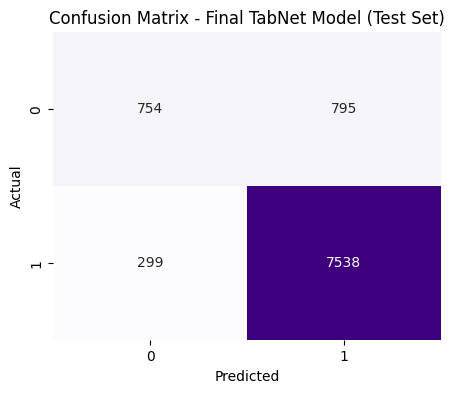

In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, confusion_matrix,
    precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_recall_curve, auc
from tqdm import tqdm

def bootstrap_ci(y_true, y_pred, y_proba, n_bootstraps=2000, alpha=0.95):

    rng = np.random.RandomState(42)

    auc_scores = []
    f1_scores = []
    recall_minority = []
    pr_auc_scores = []

    for _ in range(n_bootstraps):
        # Bootstrap sampling (sampling with replacement)
        indices = rng.choice(len(y_true), len(y_true), replace=True)

        y_true_bs = y_true[indices]
        y_pred_bs = y_pred[indices]
        y_proba_bs = y_proba[indices]

        # AUC
        try:
            auc_scores.append(roc_auc_score(y_true_bs, y_proba_bs))
        except:
            pass

        # F1 (macro)
        f1_scores.append(f1_score(y_true_bs, y_pred_bs, average='macro', zero_division=0))

        # Recall minoritas (kelas 0 → Dead)
        recall_minority.append(recall_score(y_true_bs, y_pred_bs, pos_label=0))

        # PR-AUC
        precision, recall, _ = precision_recall_curve(y_true_bs, y_proba_bs, pos_label=0)
        pr_auc_scores.append(auc(recall, precision))

    def CI(arr):
        lower = np.percentile(arr, ((1 - alpha) / 2) * 100)
        upper = np.percentile(arr, (alpha + (1 - alpha)/2) * 100)
        return (lower, upper)

    return {
        "AUC_CI": CI(auc_scores),
        "F1_macro_CI": CI(f1_scores),
        "Recall_minority_CI": CI(recall_minority),
        "PR_AUC_CI": CI(pr_auc_scores)
    }

# Load the best hyperparameters
save_dir = '/content/drive/MyDrive/SEER CRC DATASET/'
best_params_path = os.path.join(save_dir, 'best_tabnet_params.json')
with open(best_params_path, 'r') as f:
    best_params = json.load(f)

print("Loaded Best Hyperparameters:")
print(json.dumps(best_params, indent=4))


# === Asumsi sudah punya: X_train, y_train, X_val, y_val, X_test, y_test ===

X_train_np, y_train_np = X_train.values, y_train.values
X_val_np, y_val_np = X_val.values, y_val.values
X_test_np, y_test_np = X_test.values, y_test.values

# === 1️⃣ K-FOLD CROSS VALIDATION DI TRAIN SET ===
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_np, y_train_np)):
    print(f"\n🟢 Training Fold {fold+1}/5")

    X_train_fold, X_val_fold = X_train_np[train_idx], X_train_np[val_idx]
    y_train_fold, y_val_fold = y_train_np[train_idx], y_train_np[val_idx]

    # Inisialisasi model baru untuk setiap fold dengan best_params
    model = TabNetClassifier(
        n_d=best_params['n_d'],
        n_a=best_params['n_a'],
        n_steps=best_params['n_steps'],
        gamma=best_params['gamma'],
        lambda_sparse=best_params['lambda_sparse'],
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=best_params['lr']), # Use best learning rate
        scheduler_params={"step_size": 50, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='entmax',
        seed=42 + fold,
        verbose=0  # taruh di sini, bukan di .fit()
    )

    # Latih model
    model.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_val_np, y_val_np)],  # validasi tetap pakai val utama
        max_epochs=200, patience=20, # Use increased epochs and patience
        batch_size=1024, virtual_batch_size=128,
        num_workers=0, drop_last=False
    )

    # Prediksi ke VAL SET utama
    y_pred_val = model.predict(X_val_np)
    y_proba_val = model.predict_proba(X_val_np)[:, 1]

    # Ambil classification report dict (macro)
    report = classification_report(y_val_np, y_pred_val, output_dict=True, zero_division=0)
    acc = accuracy_score(y_val_np, y_pred_val)
    prec_macro = report["macro avg"]["precision"]
    rec_macro = report["macro avg"]["recall"]
    f1_macro = report["macro avg"]["f1-score"]
    auc = roc_auc_score(y_val_np, y_proba_val)

    fold_metrics.append({
        'Fold': fold + 1,
        'Accuracy': acc,
        'Precision (Macro)': prec_macro,
        'Recall (Macro)': rec_macro,
        'F1 (Macro)': f1_macro,
        'ROC-AUC': auc
    })

    print(f"✅ Fold {fold+1} | Acc: {acc:.4f} | Prec_macro: {prec_macro:.4f} | "
          f"Rec_macro: {rec_macro:.4f} | F1_macro: {f1_macro:.4f} | AUC: {auc:.4f}")

# Ringkasan hasil K-Fold
cv_df = pd.DataFrame(fold_metrics)
print("\n📊 K-Fold Validation Metrics (evaluated on VAL set):")
display(cv_df)
print("\nMean Metrics:\n", cv_df.mean(numeric_only=True))

# === 2️⃣ LATIH MODEL FINAL DI TRAIN SET PENUH ===
print("\n🚀 Training Final Model on Full TRAIN SET...")
final_model = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=best_params['lr']), # Use best learning rate
    scheduler_params={"step_size": 50, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    seed=42,
    verbose=1
)

final_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    max_epochs=200, patience=20, # Use increased epochs and patience
    batch_size=1024, virtual_batch_size=128,
    num_workers=0, drop_last=False
)

# === 3️⃣ EVALUASI FINAL MODEL DI TEST SET ===
print("\n🧪 Evaluating Final Model on TEST SET...")
y_pred_test = final_model.predict(X_test_np)
y_proba_test = final_model.predict_proba(X_test_np)[:, 1]

# Ambil classification report macro
report_test = classification_report(y_test_np, y_pred_test, output_dict=True, zero_division=0)
acc = accuracy_score(y_test_np, y_pred_test)
prec_macro = report_test["macro avg"]["precision"]
rec_macro = report_test["macro avg"]["recall"]
f1_macro = report_test["macro avg"]["f1-score"]
auc = roc_auc_score(y_test_np, y_proba_test)

print(f"\n✅ Final Test Metrics (Macro):")
print(f"Accuracy : {acc:.4f}")
print(f"Precision (Macro): {prec_macro:.4f}")
print(f"Recall (Macro)   : {rec_macro:.4f}")
print(f"F1-Score (Macro) : {f1_macro:.4f}")
print(f"ROC-AUC          : {auc:.4f}")

# === 4️⃣ CLASSIFICATION REPORT (lengkap) ===
print("\n📋 Classification Report (TEST SET):")
print(classification_report(y_test_np, y_pred_test, digits=4, zero_division=0))

# === 5️⃣ CONFUSION MATRIX ===
cm = confusion_matrix(y_test_np, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Final TabNet Model (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.metrics import auc, precision_recall_curve


from sklearn.metrics import auc, precision_recall_curve, roc_auc_score, f1_score, recall_score
import numpy as np

def bootstrap_ci(y_true, y_pred, y_proba, n_bootstraps=2000, alpha=0.95):

    rng = np.random.RandomState(42)

    auc_scores = []
    f1_scores = []
    recall_dead = []      # kelas 0
    pr_auc_dead = []      # kelas 0
    pr_auc_alive = []     # kelas 1

    for _ in range(n_bootstraps):
        # Bootstrap sampling
        idx = rng.choice(len(y_true), len(y_true), replace=True)

        y_true_bs = y_true[idx]
        y_pred_bs = y_pred[idx]
        y_proba_bs = y_proba[idx]

        # AUC
        try:
            auc_scores.append(roc_auc_score(y_true_bs, y_proba_bs))
        except:
            pass

        # F1-macro
        f1_scores.append(f1_score(y_true_bs, y_pred_bs, average='macro', zero_division=0))

        # Recall kelas 0 (Dead)
        recall_dead.append(recall_score(y_true_bs, y_pred_bs, pos_label=0))

        # PR-AUC kelas 0 (Dead)
        # KOREKSI: Gunakan probabilitas kelas 0 (1 - y_proba_bs)
        p0, r0, _ = precision_recall_curve(y_true_bs, 1 - y_proba_bs, pos_label=0)
        pr_auc_dead.append(auc(r0, p0))

        # PR-AUC kelas 1 (Alive)
        # BENAR: Gunakan probabilitas kelas 1 (y_proba_bs)
        p1, r1, _ = precision_recall_curve(y_true_bs, y_proba_bs, pos_label=1)
        pr_auc_alive.append(auc(r1, p1))

    def CI(arr):
        low = np.percentile(arr, ((1 - alpha) / 2) * 100)
        high = np.percentile(arr, (alpha + (1 - alpha)/2) * 100)
        return (low, high)

    return {
        "AUC_CI": CI(auc_scores),
        "F1_macro_CI": CI(f1_scores),
        "Recall_dead_CI": CI(recall_dead),
        "PR_AUC_dead_CI": CI(pr_auc_dead),
        "PR_AUC_alive_CI": CI(pr_auc_alive)
    }


# === 6️⃣ HITUNG 95% CONFIDENCE INTERVAL (BOOTSTRAP) ===
print("\n📦 Bootstrapping 95% Confidence Intervals (AUC, F1, Recall kelas 0, PR-AUC)...")

y_true = y_test_np
y_pred = y_pred_test
y_proba = y_proba_test

ci = bootstrap_ci(y_test_np, y_pred_test, y_proba_test, n_bootstraps=2000)

print("\n===== 95% Confidence Intervals =====")
print(f"AUC               95% CI : {ci['AUC_CI'][0]:.4f} – {ci['AUC_CI'][1]:.4f}")
print(f"F1 Macro          95% CI : {ci['F1_macro_CI'][0]:.4f} – {ci['F1_macro_CI'][1]:.4f}")
print(f"Recall Dead       95% CI : {ci['Recall_dead_CI'][0]:.4f} – {ci['Recall_dead_CI'][1]:.4f}")

print(f"PR-AUC Dead       95% CI : {ci['PR_AUC_dead_CI'][0]:.4f} – {ci['PR_AUC_dead_CI'][1]:.4f}")
print(f"PR-AUC Alive      95% CI : {ci['PR_AUC_alive_CI'][0]:.4f} – {ci['PR_AUC_alive_CI'][1]:.4f}")


📦 Bootstrapping 95% Confidence Intervals (AUC, F1, Recall kelas 0, PR-AUC)...

===== 95% Confidence Intervals =====
AUC               95% CI : 0.8813 – 0.8994
F1 Macro          95% CI : 0.7433 – 0.7679
Recall Dead       95% CI : 0.4617 – 0.5118
PR-AUC Dead       95% CI : 0.6282 – 0.6800
PR-AUC Alive      95% CI : 0.9699 – 0.9762



📊 Melakukan Analisis Tambahan (Calibration & DCA)...
✅ Brier Score: 0.0857


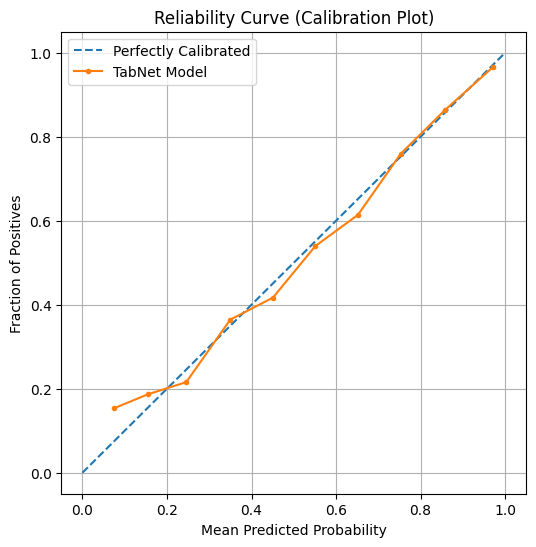

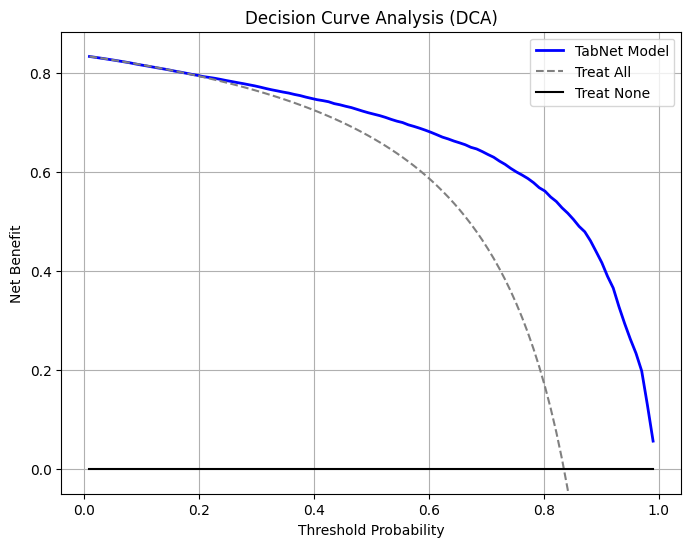

In [ ]:
# === 6️⃣ TAMBAHAN EVALUASI UNTUK REVIEWER (Calibration & DCA) ===
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

print("\n📊 Melakukan Analisis Tambahan (Calibration & DCA)...")

# --- 1. Brier Score (Semakin kecil semakin baik) ---
# Mengukur seberapa akurat probabilitas prediksi (kalibrasi)
brier = brier_score_loss(y_test_np, y_proba_test)
print(f"✅ Brier Score: {brier:.4f}")

# --- 2. Reliability Curve (Calibration Plot) ---
plt.figure(figsize=(6, 6))
prob_true, prob_pred = calibration_curve(y_test_np, y_proba_test, n_bins=10, strategy='uniform')

# Plot kurva ideal (perfectly calibrated)
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
# Plot kurva model Anda
plt.plot(prob_pred, prob_true, marker='.', label='TabNet Model')

plt.title("Reliability Curve (Calibration Plot)")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.grid(True)
plt.show()

# --- 3. Decision Curve Analysis (DCA) ---
# Fungsi manual untuk menghitung Net Benefit (karena sklearn tidak punya bawaan)
def calculate_net_benefit_model(y_true, y_prob, thresholds):
    net_benefits = []
    for thresh in thresholds:
        # Hitung prediksi berdasarkan threshold
        y_pred_thresh = (y_prob >= thresh).astype(int)

        tp = np.sum((y_true == 1) & (y_pred_thresh == 1))
        fp = np.sum((y_true == 0) & (y_pred_thresh == 1))
        n = len(y_true)

        if thresh == 1.0:
            nb = 0
        else:
            # Rumus Net Benefit
            nb = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_benefits.append(nb)
    return np.array(net_benefits)

def calculate_net_benefit_all(y_true, thresholds):
    # Strategi "Treat All": Asumsikan semua orang positif (berisiko)
    net_benefits = []
    n = len(y_true)
    prevalence = np.sum(y_true == 1) / n

    for thresh in thresholds:
        if thresh == 1.0:
            nb = 0
        else:
            nb = prevalence - (1 - prevalence) * (thresh / (1 - thresh))
        net_benefits.append(nb)
    return np.array(net_benefits)

# Setup Thresholds
thresholds = np.linspace(0.01, 0.99, 100)

# Hitung Net Benefit
nb_model = calculate_net_benefit_model(y_test_np, y_proba_test, thresholds)
nb_all = calculate_net_benefit_all(y_test_np, thresholds)
nb_none = np.zeros(len(thresholds)) # Strategi "Treat None" selalu 0

# Plot DCA
plt.figure(figsize=(8, 6))
plt.plot(thresholds, nb_model, label='TabNet Model', color='blue', linewidth=2)
plt.plot(thresholds, nb_all, label='Treat All', color='gray', linestyle='--')
plt.plot(thresholds, nb_none, label='Treat None', color='black', linestyle='-')

plt.title("Decision Curve Analysis (DCA)")
plt.xlabel("Threshold Probability")
plt.ylabel("Net Benefit")
plt.ylim(bottom=-0.05, top=max(nb_all.max(), nb_model.max()) + 0.05) # Zoom biar jelas
plt.legend()
plt.grid(True)
plt.show()

##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Training data resampled using SMOTE.")
print(f"Original training data shape: {X_train.shape}")
print(f"Resampled training data shape: {X_train_resampled.shape}")
print("\nResampled target variable distribution:")
display(y_train_resampled.value_counts())

Training data resampled using SMOTE.
Original training data shape: (32846, 32)
Resampled training data shape: (54850, 32)

Resampled target variable distribution:


SEER cause-specific death classification
0    27425
1    27425
Name: count, dtype: int64

Loaded Best Hyperparameters:
{
    "n_steps": 6,
    "n_d": 16,
    "n_a": 10,
    "lr": 0.008858667904100823,
    "lambda_sparse": 0.00014873521072935117,
    "gamma": 1.0
}

🟢 Training Fold 1/5

Early stopping occurred at epoch 49 with best_epoch = 29 and best_val_0_auc = 0.87812


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 1 | Acc: 0.8399 | Prec_macro: 0.7247 | Rec_macro: 0.7887 | F1_macro: 0.7477 | AUC: 0.8781

🟢 Training Fold 2/5

Early stopping occurred at epoch 40 with best_epoch = 20 and best_val_0_auc = 0.87136


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 2 | Acc: 0.8404 | Prec_macro: 0.7218 | Rec_macro: 0.7729 | F1_macro: 0.7416 | AUC: 0.8714

🟢 Training Fold 3/5

Early stopping occurred at epoch 52 with best_epoch = 32 and best_val_0_auc = 0.87457


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 3 | Acc: 0.8291 | Prec_macro: 0.7131 | Rec_macro: 0.7838 | F1_macro: 0.7366 | AUC: 0.8746

🟢 Training Fold 4/5

Early stopping occurred at epoch 45 with best_epoch = 25 and best_val_0_auc = 0.87592


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 4 | Acc: 0.8572 | Prec_macro: 0.7427 | Rec_macro: 0.7670 | F1_macro: 0.7537 | AUC: 0.8759

🟢 Training Fold 5/5

Early stopping occurred at epoch 46 with best_epoch = 26 and best_val_0_auc = 0.87422


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 5 | Acc: 0.8370 | Prec_macro: 0.7202 | Rec_macro: 0.7823 | F1_macro: 0.7426 | AUC: 0.8742

📊 K-Fold Validation Metrics (evaluated on VAL set):


Fold  Accuracy  Precision (Macro)  Recall (Macro)  F1 (Macro)   ROC-AUC
0     1  0.839940           0.724686        0.788731    0.747700  0.878117
1     2  0.840367           0.721849        0.772943    0.741577  0.871359
2     3  0.829071           0.713121        0.783773    0.736605  0.874572
3     4  0.857204           0.742667        0.766984    0.753654  0.875923
4     5  0.836957           0.720244        0.782286    0.742578  0.874219


Mean Metrics:
 Fold                 3.000000
Accuracy             0.840708
Precision (Macro)    0.724513
Recall (Macro)       0.778943
F1 (Macro)           0.744423
ROC-AUC              0.874838
dtype: float64

🚀 Training Final Model on Full TRAIN SET...


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.58868 | val_0_auc: 0.51088 |  0:00:03s
epoch 1  | loss: 0.41648 | val_0_auc: 0.50013 |  0:00:07s
epoch 2  | loss: 0.37518 | val_0_auc: 0.4997  |  0:00:11s
epoch 3  | loss: 0.3585  | val_0_auc: 0.50222 |  0:00:14s
epoch 4  | loss: 0.34686 | val_0_auc: 0.49945 |  0:00:19s
epoch 5  | loss: 0.33879 | val_0_auc: 0.50073 |  0:00:22s
epoch 6  | loss: 0.33284 | val_0_auc: 0.49517 |  0:00:26s
epoch 7  | loss: 0.32887 | val_0_auc: 0.52445 |  0:00:29s
epoch 8  | loss: 0.3249  | val_0_auc: 0.53632 |  0:00:33s
epoch 9  | loss: 0.32355 | val_0_auc: 0.68398 |  0:00:37s
epoch 10 | loss: 0.31842 | val_0_auc: 0.7151  |  0:00:41s
epoch 11 | loss: 0.31714 | val_0_auc: 0.80914 |  0:00:45s
epoch 12 | loss: 0.31675 | val_0_auc: 0.83494 |  0:00:49s
epoch 13 | loss: 0.31128 | val_0_auc: 0.85536 |  0:00:52s
epoch 14 | loss: 0.31027 | val_0_auc: 0.86322 |  0:00:56s
epoch 15 | loss: 0.30911 | val_0_auc: 0.86248 |  0:01:00s
epoch 16 | loss: 0.31016 | val_0_auc: 0.86623 |  0:01:04s
epoch 17 | los

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



🧪 Evaluating Final Model on TEST SET...

✅ Final Test Metrics (Macro):
Accuracy : 0.8472
Precision (Macro): 0.7294
Recall (Macro)   : 0.7707
F1-Score (Macro) : 0.7464
ROC-AUC          : 0.8712

📋 Classification Report (TEST SET):
              precision    recall  f1-score   support

           0     0.5300    0.6566    0.5865      1549
           1     0.9288    0.8849    0.9063      7837

    accuracy                         0.8472      9386
   macro avg     0.7294    0.7707    0.7464      9386
weighted avg     0.8629    0.8472    0.8535      9386



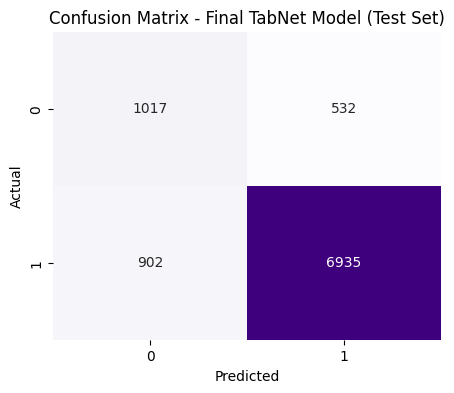

In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, confusion_matrix,
    precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

# Load the best hyperparameters
save_dir = '/content/drive/MyDrive/SEER CRC DATASET/'
best_params_path = os.path.join(save_dir, 'best_tabnet_params.json')
with open(best_params_path, 'r') as f:
    best_params = json.load(f)

print("Loaded Best Hyperparameters:")
print(json.dumps(best_params, indent=4))


# === Asumsi sudah punya: X_train, y_train, X_val, y_val, X_test, y_test ===

X_train_np, y_train_np = X_train_resampled.values, y_train_resampled.values
X_val_np, y_val_np = X_val.values, y_val.values
X_test_np, y_test_np = X_test.values, y_test.values

# === 1️⃣ K-FOLD CROSS VALIDATION DI TRAIN SET ===
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_np, y_train_np)):
    print(f"\n🟢 Training Fold {fold+1}/5")

    X_train_fold, X_val_fold = X_train_np[train_idx], X_train_np[val_idx]
    y_train_fold, y_val_fold = y_train_np[train_idx], y_train_np[val_idx]

    # Inisialisasi model baru untuk setiap fold dengan best_params
    model = TabNetClassifier(
        n_d=best_params['n_d'],
        n_a=best_params['n_a'],
        n_steps=best_params['n_steps'],
        gamma=best_params['gamma'],
        lambda_sparse=best_params['lambda_sparse'],
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=best_params['lr']), # Use best learning rate
        scheduler_params={"step_size": 50, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='entmax',
        seed=42 + fold,
        verbose=0  # taruh di sini, bukan di .fit()
    )

    # Latih model
    model.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_val_np, y_val_np)],  # validasi tetap pakai val utama
        max_epochs=200, patience=20, # Use increased epochs and patience
        batch_size=1024, virtual_batch_size=128,
        num_workers=0, drop_last=False
    )

    # Prediksi ke VAL SET utama
    y_pred_val = model.predict(X_val_np)
    y_proba_val = model.predict_proba(X_val_np)[:, 1]

    # Ambil classification report dict (macro)
    report = classification_report(y_val_np, y_pred_val, output_dict=True, zero_division=0)
    acc = accuracy_score(y_val_np, y_pred_val)
    prec_macro = report["macro avg"]["precision"]
    rec_macro = report["macro avg"]["recall"]
    f1_macro = report["macro avg"]["f1-score"]
    auc = roc_auc_score(y_val_np, y_proba_val)

    fold_metrics.append({
        'Fold': fold + 1,
        'Accuracy': acc,
        'Precision (Macro)': prec_macro,
        'Recall (Macro)': rec_macro,
        'F1 (Macro)': f1_macro,
        'ROC-AUC': auc
    })

    print(f"✅ Fold {fold+1} | Acc: {acc:.4f} | Prec_macro: {prec_macro:.4f} | "
          f"Rec_macro: {rec_macro:.4f} | F1_macro: {f1_macro:.4f} | AUC: {auc:.4f}")

# Ringkasan hasil K-Fold
cv_df = pd.DataFrame(fold_metrics)
print("\n📊 K-Fold Validation Metrics (evaluated on VAL set):")
display(cv_df)
print("\nMean Metrics:\n", cv_df.mean(numeric_only=True))

# === 2️⃣ LATIH MODEL FINAL DI TRAIN SET PENUH ===
print("\n🚀 Training Final Model on Full TRAIN SET...")
final_model = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=best_params['lr']), # Use best learning rate
    scheduler_params={"step_size": 50, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    seed=42,
    verbose=1
)

final_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    max_epochs=200, patience=20, # Use increased epochs and patience
    batch_size=1024, virtual_batch_size=128,
    num_workers=0, drop_last=False
)

# === 3️⃣ EVALUASI FINAL MODEL DI TEST SET ===
print("\n🧪 Evaluating Final Model on TEST SET...")
y_pred_test = final_model.predict(X_test_np)
y_proba_test = final_model.predict_proba(X_test_np)[:, 1]

# Ambil classification report macro
report_test = classification_report(y_test_np, y_pred_test, output_dict=True, zero_division=0)
acc = accuracy_score(y_test_np, y_pred_test)
prec_macro = report_test["macro avg"]["precision"]
rec_macro = report_test["macro avg"]["recall"]
f1_macro = report_test["macro avg"]["f1-score"]
auc = roc_auc_score(y_test_np, y_proba_test)

print(f"\n✅ Final Test Metrics (Macro):")
print(f"Accuracy : {acc:.4f}")
print(f"Precision (Macro): {prec_macro:.4f}")
print(f"Recall (Macro)   : {rec_macro:.4f}")
print(f"F1-Score (Macro) : {f1_macro:.4f}")
print(f"ROC-AUC          : {auc:.4f}")

# === 4️⃣ CLASSIFICATION REPORT (lengkap) ===
print("\n📋 Classification Report (TEST SET):")
print(classification_report(y_test_np, y_pred_test, digits=4, zero_division=0))

# === 5️⃣ CONFUSION MATRIX ===
cm = confusion_matrix(y_test_np, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Final TabNet Model (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.metrics import auc, precision_recall_curve


from sklearn.metrics import auc, precision_recall_curve, roc_auc_score, f1_score, recall_score
import numpy as np

def bootstrap_ci(y_true, y_pred, y_proba, n_bootstraps=2000, alpha=0.95):

    rng = np.random.RandomState(42)

    auc_scores = []
    f1_scores = []
    recall_dead = []      # kelas 0
    pr_auc_dead = []      # kelas 0
    pr_auc_alive = []     # kelas 1

    for _ in range(n_bootstraps):
        # Bootstrap sampling
        idx = rng.choice(len(y_true), len(y_true), replace=True)

        y_true_bs = y_true[idx]
        y_pred_bs = y_pred[idx]
        y_proba_bs = y_proba[idx]

        # AUC
        try:
            auc_scores.append(roc_auc_score(y_true_bs, y_proba_bs))
        except:
            pass

        # F1-macro
        f1_scores.append(f1_score(y_true_bs, y_pred_bs, average='macro', zero_division=0))

        # Recall kelas 0 (Dead)
        recall_dead.append(recall_score(y_true_bs, y_pred_bs, pos_label=0))

        # PR-AUC kelas 0 (Dead)
        # KOREKSI: Gunakan probabilitas kelas 0 (1 - y_proba_bs)
        p0, r0, _ = precision_recall_curve(y_true_bs, 1 - y_proba_bs, pos_label=0)
        pr_auc_dead.append(auc(r0, p0))

        # PR-AUC kelas 1 (Alive)
        # BENAR: Gunakan probabilitas kelas 1 (y_proba_bs)
        p1, r1, _ = precision_recall_curve(y_true_bs, y_proba_bs, pos_label=1)
        pr_auc_alive.append(auc(r1, p1))

    def CI(arr):
        low = np.percentile(arr, ((1 - alpha) / 2) * 100)
        high = np.percentile(arr, (alpha + (1 - alpha)/2) * 100)
        return (low, high)

    return {
        "AUC_CI": CI(auc_scores),
        "F1_macro_CI": CI(f1_scores),
        "Recall_dead_CI": CI(recall_dead),
        "PR_AUC_dead_CI": CI(pr_auc_dead),
        "PR_AUC_alive_CI": CI(pr_auc_alive)
    }


# === 6️⃣ HITUNG 95% CONFIDENCE INTERVAL (BOOTSTRAP) ===
print("\n📦 Bootstrapping 95% Confidence Intervals (AUC, F1, Recall kelas 0, PR-AUC)...")

y_true = y_test_np
y_pred = y_pred_test
y_proba = y_proba_test

ci = bootstrap_ci(y_test_np, y_pred_test, y_proba_test, n_bootstraps=2000)

print("\n===== 95% Confidence Intervals =====")
print(f"AUC               95% CI : {ci['AUC_CI'][0]:.4f} – {ci['AUC_CI'][1]:.4f}")
print(f"F1 Macro          95% CI : {ci['F1_macro_CI'][0]:.4f} – {ci['F1_macro_CI'][1]:.4f}")
print(f"Recall Dead       95% CI : {ci['Recall_dead_CI'][0]:.4f} – {ci['Recall_dead_CI'][1]:.4f}")

print(f"PR-AUC Dead       95% CI : {ci['PR_AUC_dead_CI'][0]:.4f} – {ci['PR_AUC_dead_CI'][1]:.4f}")
print(f"PR-AUC Alive      95% CI : {ci['PR_AUC_alive_CI'][0]:.4f} – {ci['PR_AUC_alive_CI'][1]:.4f}")


📦 Bootstrapping 95% Confidence Intervals (AUC, F1, Recall kelas 0, PR-AUC)...

===== 95% Confidence Intervals =====
AUC               95% CI : 0.8619 – 0.8810
F1 Macro          95% CI : 0.7354 – 0.7578
Recall Dead       95% CI : 0.6318 – 0.6817
PR-AUC Dead       95% CI : 0.5796 – 0.6313
PR-AUC Alive      95% CI : 0.9644 – 0.9716



📊 Melakukan Analisis Tambahan (Calibration & DCA)...
✅ Brier Score: 0.1087


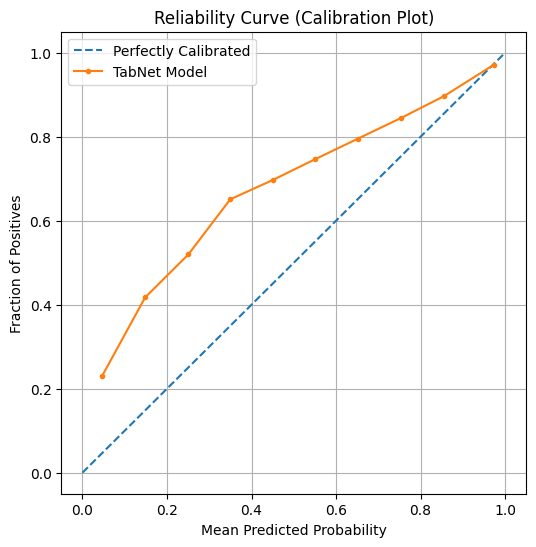

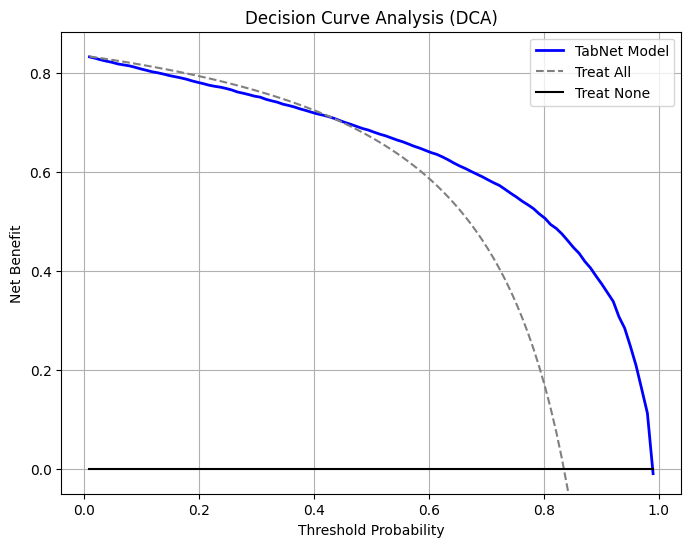

In [ ]:
# === 6️⃣ TAMBAHAN EVALUASI UNTUK REVIEWER (Calibration & DCA) ===
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

print("\n📊 Melakukan Analisis Tambahan (Calibration & DCA)...")

# --- 1. Brier Score (Semakin kecil semakin baik) ---
# Mengukur seberapa akurat probabilitas prediksi (kalibrasi)
brier = brier_score_loss(y_test_np, y_proba_test)
print(f"✅ Brier Score: {brier:.4f}")

# --- 2. Reliability Curve (Calibration Plot) ---
plt.figure(figsize=(6, 6))
prob_true, prob_pred = calibration_curve(y_test_np, y_proba_test, n_bins=10, strategy='uniform')

# Plot kurva ideal (perfectly calibrated)
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
# Plot kurva model Anda
plt.plot(prob_pred, prob_true, marker='.', label='TabNet Model')

plt.title("Reliability Curve (Calibration Plot)")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.grid(True)
plt.show()

# --- 3. Decision Curve Analysis (DCA) ---
# Fungsi manual untuk menghitung Net Benefit (karena sklearn tidak punya bawaan)
def calculate_net_benefit_model(y_true, y_prob, thresholds):
    net_benefits = []
    for thresh in thresholds:
        # Hitung prediksi berdasarkan threshold
        y_pred_thresh = (y_prob >= thresh).astype(int)

        tp = np.sum((y_true == 1) & (y_pred_thresh == 1))
        fp = np.sum((y_true == 0) & (y_pred_thresh == 1))
        n = len(y_true)

        if thresh == 1.0:
            nb = 0
        else:
            # Rumus Net Benefit
            nb = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_benefits.append(nb)
    return np.array(net_benefits)

def calculate_net_benefit_all(y_true, thresholds):
    # Strategi "Treat All": Asumsikan semua orang positif (berisiko)
    net_benefits = []
    n = len(y_true)
    prevalence = np.sum(y_true == 1) / n

    for thresh in thresholds:
        if thresh == 1.0:
            nb = 0
        else:
            nb = prevalence - (1 - prevalence) * (thresh / (1 - thresh))
        net_benefits.append(nb)
    return np.array(net_benefits)

# Setup Thresholds
thresholds = np.linspace(0.01, 0.99, 100)

# Hitung Net Benefit
nb_model = calculate_net_benefit_model(y_test_np, y_proba_test, thresholds)
nb_all = calculate_net_benefit_all(y_test_np, thresholds)
nb_none = np.zeros(len(thresholds)) # Strategi "Treat None" selalu 0

# Plot DCA
plt.figure(figsize=(8, 6))
plt.plot(thresholds, nb_model, label='TabNet Model', color='blue', linewidth=2)
plt.plot(thresholds, nb_all, label='Treat All', color='gray', linestyle='--')
plt.plot(thresholds, nb_none, label='Treat None', color='black', linestyle='-')

plt.title("Decision Curve Analysis (DCA)")
plt.xlabel("Threshold Probability")
plt.ylabel("Net Benefit")
plt.ylim(bottom=-0.05, top=max(nb_all.max(), nb_model.max()) + 0.05) # Zoom biar jelas
plt.legend()
plt.grid(True)
plt.show()

##ENN


In [ ]:
!pip install -U imbalanced-learn --quiet

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours as ENN

# Initialize ENN
enn = ENN(n_neighbors=3, kind_sel='all', n_jobs=-1)
X_train_resampled_ENN, y_train_resampled_ENN = enn.fit_resample(X_train, y_train)

print("✅ Training data resampled using ENN.")
print(f"Original training data shape: {X_train.shape}")
print(f"Resampled training data shape (ENN): {X_train_resampled_ENN.shape}")
print("\nResampled target variable distribution (ENN):")
display(y_train_resampled_ENN.value_counts())


✅ Training data resampled using ENN.
Original training data shape: (32846, 32)
Resampled training data shape (ENN): (25912, 32)

Resampled target variable distribution (ENN):


SEER cause-specific death classification
1    20491
0     5421
Name: count, dtype: int64

Loaded Best Hyperparameters:
{
    "n_steps": 6,
    "n_d": 16,
    "n_a": 10,
    "lr": 0.008858667904100823,
    "lambda_sparse": 0.00014873521072935117,
    "gamma": 1.0
}

🟢 Training Fold 1/5

Early stopping occurred at epoch 62 with best_epoch = 42 and best_val_0_auc = 0.88905


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 1 | Acc: 0.8623 | Prec_macro: 0.7515 | Rec_macro: 0.7830 | F1_macro: 0.7654 | AUC: 0.8891

🟢 Training Fold 2/5

Early stopping occurred at epoch 24 with best_epoch = 4 and best_val_0_auc = 0.57561


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 2 | Acc: 0.5899 | Prec_macro: 0.5422 | Rec_macro: 0.5748 | F1_macro: 0.5083 | AUC: 0.5756

🟢 Training Fold 3/5

Early stopping occurred at epoch 60 with best_epoch = 40 and best_val_0_auc = 0.88783


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 3 | Acc: 0.8585 | Prec_macro: 0.7466 | Rec_macro: 0.7890 | F1_macro: 0.7643 | AUC: 0.8878

🟢 Training Fold 4/5

Early stopping occurred at epoch 20 with best_epoch = 0 and best_val_0_auc = 0.69707


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 4 | Acc: 0.7012 | Prec_macro: 0.5870 | Rec_macro: 0.6352 | F1_macro: 0.5882 | AUC: 0.6971

🟢 Training Fold 5/5

Early stopping occurred at epoch 63 with best_epoch = 43 and best_val_0_auc = 0.88756


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 5 | Acc: 0.8651 | Prec_macro: 0.7558 | Rec_macro: 0.7852 | F1_macro: 0.7689 | AUC: 0.8876

📊 K-Fold Validation Metrics (evaluated on VAL set):


Fold  Accuracy  Precision (Macro)  Recall (Macro)  F1 (Macro)   ROC-AUC
0     1  0.862319           0.751502        0.782986    0.765375  0.889052
1     2  0.589940           0.542163        0.574827    0.508288  0.575607
2     3  0.858483           0.746568        0.788968    0.764294  0.887832
3     4  0.701194           0.587042        0.635249    0.588171  0.697066
4     5  0.865090           0.755827        0.785163    0.768907  0.887561


Mean Metrics:
 Fold                 3.000000
Accuracy             0.775405
Precision (Macro)    0.676620
Recall (Macro)       0.713439
F1 (Macro)           0.679007
ROC-AUC              0.787424
dtype: float64

🚀 Training Final Model on Full TRAIN SET...


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.55398 | val_0_auc: 0.3874  |  0:00:02s
epoch 1  | loss: 0.37139 | val_0_auc: 0.56269 |  0:00:04s
epoch 2  | loss: 0.32751 | val_0_auc: 0.50567 |  0:00:05s
epoch 3  | loss: 0.3022  | val_0_auc: 0.53446 |  0:00:07s
epoch 4  | loss: 0.29301 | val_0_auc: 0.38547 |  0:00:09s
epoch 5  | loss: 0.28599 | val_0_auc: 0.59356 |  0:00:11s
epoch 6  | loss: 0.28154 | val_0_auc: 0.48375 |  0:00:13s
epoch 7  | loss: 0.27281 | val_0_auc: 0.68361 |  0:00:15s
epoch 8  | loss: 0.26931 | val_0_auc: 0.48031 |  0:00:17s
epoch 9  | loss: 0.2703  | val_0_auc: 0.58113 |  0:00:19s
epoch 10 | loss: 0.26467 | val_0_auc: 0.45176 |  0:00:21s
epoch 11 | loss: 0.26338 | val_0_auc: 0.61546 |  0:00:22s
epoch 12 | loss: 0.26334 | val_0_auc: 0.67623 |  0:00:24s
epoch 13 | loss: 0.25605 | val_0_auc: 0.6591  |  0:00:27s
epoch 14 | loss: 0.25935 | val_0_auc: 0.72018 |  0:00:29s
epoch 15 | loss: 0.25311 | val_0_auc: 0.71787 |  0:00:30s
epoch 16 | loss: 0.25255 | val_0_auc: 0.69384 |  0:00:32s
epoch 17 | los

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



🧪 Evaluating Final Model on TEST SET...

✅ Final Test Metrics (Macro):
Accuracy : 0.8650
Precision (Macro): 0.7559
Recall (Macro)   : 0.7907
F1-Score (Macro) : 0.7710
ROC-AUC          : 0.8885

📋 Classification Report (TEST SET):
              precision    recall  f1-score   support

           0     0.5773    0.6798    0.6244      1549
           1     0.9344    0.9016    0.9177      7837

    accuracy                         0.8650      9386
   macro avg     0.7559    0.7907    0.7710      9386
weighted avg     0.8755    0.8650    0.8693      9386



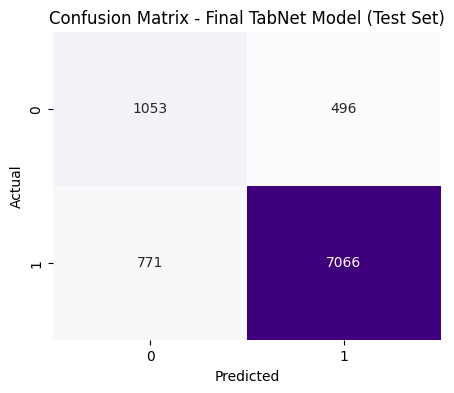

Successfully saved model at /content/drive/MyDrive/SEER CRC DATASET/final_tabnet_model.zip.zip
✅ Model saved successfully at: /content/drive/MyDrive/SEER CRC DATASET/final_tabnet_model.zip


In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, confusion_matrix,
    precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

# Load the best hyperparameters
save_dir = '/content/drive/MyDrive/SEER CRC DATASET/'
best_params_path = os.path.join(save_dir, 'best_tabnet_params.json')
with open(best_params_path, 'r') as f:
    best_params = json.load(f)

print("Loaded Best Hyperparameters:")
print(json.dumps(best_params, indent=4))


# === Asumsi sudah punya: X_train, y_train, X_val, y_val, X_test, y_test ===

X_train_np, y_train_np = X_train_resampled_ENN.values, y_train_resampled_ENN.values
X_val_np, y_val_np = X_val.values, y_val.values
X_test_np, y_test_np = X_test.values, y_test.values

# === 1️⃣ K-FOLD CROSS VALIDATION DI TRAIN SET ===
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_np, y_train_np)):
    print(f"\n🟢 Training Fold {fold+1}/5")

    X_train_fold, X_val_fold = X_train_np[train_idx], X_train_np[val_idx]
    y_train_fold, y_val_fold = y_train_np[train_idx], y_train_np[val_idx]

    # Inisialisasi model baru untuk setiap fold dengan best_params
    model = TabNetClassifier(
        n_d=best_params['n_d'],
        n_a=best_params['n_a'],
        n_steps=best_params['n_steps'],
        gamma=best_params['gamma'],
        lambda_sparse=best_params['lambda_sparse'],
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=best_params['lr']), # Use best learning rate
        scheduler_params={"step_size": 50, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='entmax',
        seed=42 + fold,
        verbose=0  # taruh di sini, bukan di .fit()
    )

    # Latih model
    model.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_val_np, y_val_np)],  # validasi tetap pakai val utama
        max_epochs=200, patience=20, # Use increased epochs and patience
        batch_size=1024, virtual_batch_size=128,
        num_workers=0, drop_last=False
    )

    # Prediksi ke VAL SET utama
    y_pred_val = model.predict(X_val_np)
    y_proba_val = model.predict_proba(X_val_np)[:, 1]

    # Ambil classification report dict (macro)
    report = classification_report(y_val_np, y_pred_val, output_dict=True, zero_division=0)
    acc = accuracy_score(y_val_np, y_pred_val)
    prec_macro = report["macro avg"]["precision"]
    rec_macro = report["macro avg"]["recall"]
    f1_macro = report["macro avg"]["f1-score"]
    auc = roc_auc_score(y_val_np, y_proba_val)

    fold_metrics.append({
        'Fold': fold + 1,
        'Accuracy': acc,
        'Precision (Macro)': prec_macro,
        'Recall (Macro)': rec_macro,
        'F1 (Macro)': f1_macro,
        'ROC-AUC': auc
    })

    print(f"✅ Fold {fold+1} | Acc: {acc:.4f} | Prec_macro: {prec_macro:.4f} | "
          f"Rec_macro: {rec_macro:.4f} | F1_macro: {f1_macro:.4f} | AUC: {auc:.4f}")

# Ringkasan hasil K-Fold
cv_df = pd.DataFrame(fold_metrics)
print("\n📊 K-Fold Validation Metrics (evaluated on VAL set):")
display(cv_df)
print("\nMean Metrics:\n", cv_df.mean(numeric_only=True))

# === 2️⃣ LATIH MODEL FINAL DI TRAIN SET PENUH ===
print("\n🚀 Training Final Model on Full TRAIN SET...")
final_model = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=best_params['lr']), # Use best learning rate
    scheduler_params={"step_size": 50, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    seed=42,
    verbose=1
)

final_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    max_epochs=200, patience=20, # Use increased epochs and patience
    batch_size=1024, virtual_batch_size=128,
    num_workers=0, drop_last=False
)

# === 3️⃣ EVALUASI FINAL MODEL DI TEST SET ===
print("\n🧪 Evaluating Final Model on TEST SET...")
y_pred_test = final_model.predict(X_test_np)
y_proba_test = final_model.predict_proba(X_test_np)[:, 1]

# Ambil classification report macro
report_test = classification_report(y_test_np, y_pred_test, output_dict=True, zero_division=0)
acc = accuracy_score(y_test_np, y_pred_test)
prec_macro = report_test["macro avg"]["precision"]
rec_macro = report_test["macro avg"]["recall"]
f1_macro = report_test["macro avg"]["f1-score"]
auc = roc_auc_score(y_test_np, y_proba_test)

print(f"\n✅ Final Test Metrics (Macro):")
print(f"Accuracy : {acc:.4f}")
print(f"Precision (Macro): {prec_macro:.4f}")
print(f"Recall (Macro)   : {rec_macro:.4f}")
print(f"F1-Score (Macro) : {f1_macro:.4f}")
print(f"ROC-AUC          : {auc:.4f}")

# === 4️⃣ CLASSIFICATION REPORT (lengkap) ===
print("\n📋 Classification Report (TEST SET):")
print(classification_report(y_test_np, y_pred_test, digits=4, zero_division=0))

# === 5️⃣ CONFUSION MATRIX ===
cm = confusion_matrix(y_test_np, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Final TabNet Model (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===  SAVE TRAINED MODEL ===
model_save_path = os.path.join(save_dir, "final_tabnet_model.zip")
final_model.save_model(model_save_path)
print(f"✅ Model saved successfully at: {model_save_path}")

In [ ]:
from sklearn.metrics import auc, precision_recall_curve


from sklearn.metrics import auc, precision_recall_curve, roc_auc_score, f1_score, recall_score
import numpy as np

def bootstrap_ci(y_true, y_pred, y_proba, n_bootstraps=2000, alpha=0.95):

    rng = np.random.RandomState(42)

    auc_scores = []
    f1_scores = []
    recall_dead = []      # kelas 0
    pr_auc_dead = []      # kelas 0
    pr_auc_alive = []     # kelas 1

    for _ in range(n_bootstraps):
        # Bootstrap sampling
        idx = rng.choice(len(y_true), len(y_true), replace=True)

        y_true_bs = y_true[idx]
        y_pred_bs = y_pred[idx]
        y_proba_bs = y_proba[idx]

        # AUC
        try:
            auc_scores.append(roc_auc_score(y_true_bs, y_proba_bs))
        except:
            pass

        # F1-macro
        f1_scores.append(f1_score(y_true_bs, y_pred_bs, average='macro', zero_division=0))

        # Recall kelas 0 (Dead)
        recall_dead.append(recall_score(y_true_bs, y_pred_bs, pos_label=0))

        # PR-AUC kelas 0 (Dead)
        # KOREKSI: Gunakan probabilitas kelas 0 (1 - y_proba_bs)
        p0, r0, _ = precision_recall_curve(y_true_bs, 1 - y_proba_bs, pos_label=0)
        pr_auc_dead.append(auc(r0, p0))

        # PR-AUC kelas 1 (Alive)
        # BENAR: Gunakan probabilitas kelas 1 (y_proba_bs)
        p1, r1, _ = precision_recall_curve(y_true_bs, y_proba_bs, pos_label=1)
        pr_auc_alive.append(auc(r1, p1))

    def CI(arr):
        low = np.percentile(arr, ((1 - alpha) / 2) * 100)
        high = np.percentile(arr, (alpha + (1 - alpha)/2) * 100)
        return (low, high)

    return {
        "AUC_CI": CI(auc_scores),
        "F1_macro_CI": CI(f1_scores),
        "Recall_dead_CI": CI(recall_dead),
        "PR_AUC_dead_CI": CI(pr_auc_dead),
        "PR_AUC_alive_CI": CI(pr_auc_alive)
    }


# === 6️⃣ HITUNG 95% CONFIDENCE INTERVAL (BOOTSTRAP) ===
print("\n📦 Bootstrapping 95% Confidence Intervals (AUC, F1, Recall kelas 0, PR-AUC)...")

y_true = y_test_np
y_pred = y_pred_test
y_proba = y_proba_test

ci = bootstrap_ci(y_test_np, y_pred_test, y_proba_test, n_bootstraps=2000)

print("\n===== 95% Confidence Intervals =====")
print(f"AUC               95% CI : {ci['AUC_CI'][0]:.4f} – {ci['AUC_CI'][1]:.4f}")
print(f"F1 Macro          95% CI : {ci['F1_macro_CI'][0]:.4f} – {ci['F1_macro_CI'][1]:.4f}")
print(f"Recall Dead       95% CI : {ci['Recall_dead_CI'][0]:.4f} – {ci['Recall_dead_CI'][1]:.4f}")

print(f"PR-AUC Dead       95% CI : {ci['PR_AUC_dead_CI'][0]:.4f} – {ci['PR_AUC_dead_CI'][1]:.4f}")
print(f"PR-AUC Alive      95% CI : {ci['PR_AUC_alive_CI'][0]:.4f} – {ci['PR_AUC_alive_CI'][1]:.4f}")


📦 Bootstrapping 95% Confidence Intervals (AUC, F1, Recall kelas 0, PR-AUC)...

===== 95% Confidence Intervals =====
AUC               95% CI : 0.8803 – 0.8975
F1 Macro          95% CI : 0.7599 – 0.7825
Recall Dead       95% CI : 0.6566 – 0.7034
PR-AUC Dead       95% CI : 0.6057 – 0.6573
PR-AUC Alive      95% CI : 0.9708 – 0.9764



📊 Melakukan Analisis Tambahan (Calibration & DCA)...
✅ Brier Score: 0.1020


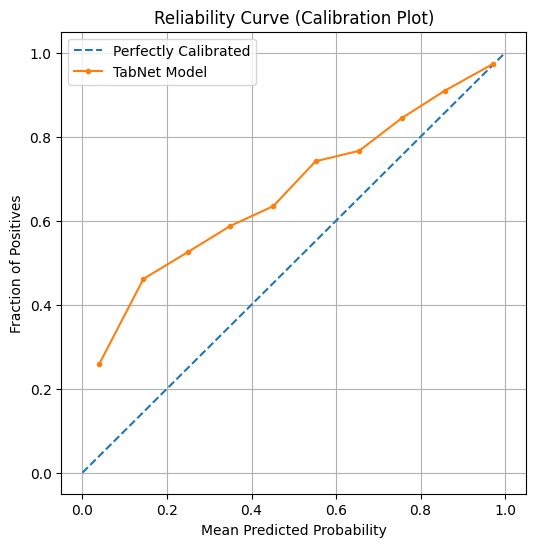

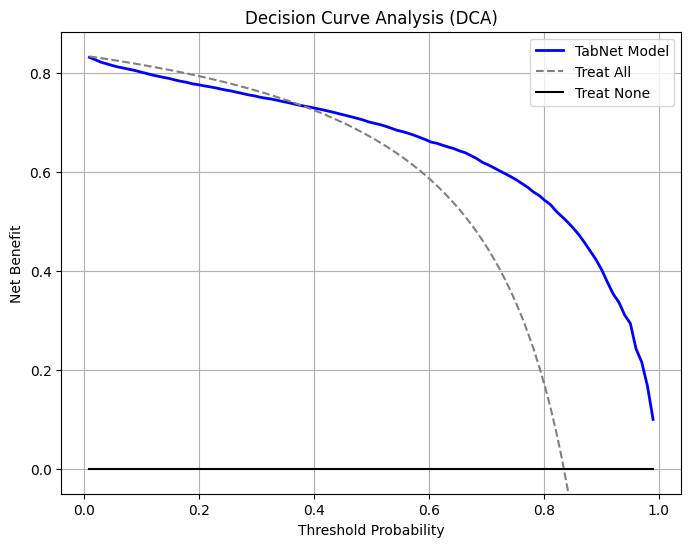

In [ ]:
# === 6️⃣ TAMBAHAN EVALUASI UNTUK REVIEWER (Calibration & DCA) ===
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

print("\n📊 Melakukan Analisis Tambahan (Calibration & DCA)...")

# --- 1. Brier Score (Semakin kecil semakin baik) ---
# Mengukur seberapa akurat probabilitas prediksi (kalibrasi)
brier = brier_score_loss(y_test_np, y_proba_test)
print(f"✅ Brier Score: {brier:.4f}")

# --- 2. Reliability Curve (Calibration Plot) ---
plt.figure(figsize=(6, 6))
prob_true, prob_pred = calibration_curve(y_test_np, y_proba_test, n_bins=10, strategy='uniform')

# Plot kurva ideal (perfectly calibrated)
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
# Plot kurva model Anda
plt.plot(prob_pred, prob_true, marker='.', label='TabNet Model')

plt.title("Reliability Curve (Calibration Plot)")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.grid(True)
plt.show()

# --- 3. Decision Curve Analysis (DCA) ---
# Fungsi manual untuk menghitung Net Benefit (karena sklearn tidak punya bawaan)
def calculate_net_benefit_model(y_true, y_prob, thresholds):
    net_benefits = []
    for thresh in thresholds:
        # Hitung prediksi berdasarkan threshold
        y_pred_thresh = (y_prob >= thresh).astype(int)

        tp = np.sum((y_true == 1) & (y_pred_thresh == 1))
        fp = np.sum((y_true == 0) & (y_pred_thresh == 1))
        n = len(y_true)

        if thresh == 1.0:
            nb = 0
        else:
            # Rumus Net Benefit
            nb = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_benefits.append(nb)
    return np.array(net_benefits)

def calculate_net_benefit_all(y_true, thresholds):
    # Strategi "Treat All": Asumsikan semua orang positif (berisiko)
    net_benefits = []
    n = len(y_true)
    prevalence = np.sum(y_true == 1) / n

    for thresh in thresholds:
        if thresh == 1.0:
            nb = 0
        else:
            nb = prevalence - (1 - prevalence) * (thresh / (1 - thresh))
        net_benefits.append(nb)
    return np.array(net_benefits)

# Setup Thresholds
thresholds = np.linspace(0.01, 0.99, 100)

# Hitung Net Benefit
nb_model = calculate_net_benefit_model(y_test_np, y_proba_test, thresholds)
nb_all = calculate_net_benefit_all(y_test_np, thresholds)
nb_none = np.zeros(len(thresholds)) # Strategi "Treat None" selalu 0

# Plot DCA
plt.figure(figsize=(8, 6))
plt.plot(thresholds, nb_model, label='TabNet Model', color='blue', linewidth=2)
plt.plot(thresholds, nb_all, label='Treat All', color='gray', linestyle='--')
plt.plot(thresholds, nb_none, label='Treat None', color='black', linestyle='-')

plt.title("Decision Curve Analysis (DCA)")
plt.xlabel("Threshold Probability")
plt.ylabel("Net Benefit")
plt.ylim(bottom=-0.05, top=max(nb_all.max(), nb_model.max()) + 0.05) # Zoom biar jelas
plt.legend()
plt.grid(True)
plt.show()

##SMOTEENN

In [ ]:
from imblearn.combine import SMOTEENN

# Initialize SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN to the training data
X_train_resampled_smoteenn, y_train_resampled_smoteenn = smote_enn.fit_resample(X_train, y_train)

print("Training data resampled using SMOTEENN.")
print(f"Original training data shape: {X_train.shape}")
print(f"Resampled training data shape (SMOTEENN): {X_train_resampled_smoteenn.shape}")
print("\nResampled target variable distribution (SMOTEENN):")
display(y_train_resampled_smoteenn.value_counts())

Training data resampled using SMOTEENN.
Original training data shape: (32846, 32)
Resampled training data shape (SMOTEENN): (42369, 32)

Resampled target variable distribution (SMOTEENN):


SEER cause-specific death classification
0    24236
1    18133
Name: count, dtype: int64

Loaded Best Hyperparameters:
{
    "n_steps": 6,
    "n_d": 16,
    "n_a": 10,
    "lr": 0.008858667904100823,
    "lambda_sparse": 0.00014873521072935117,
    "gamma": 1.0
}

🟢 Training Fold 1/5

Early stopping occurred at epoch 43 with best_epoch = 23 and best_val_0_auc = 0.88307


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 1 | Acc: 0.8374 | Prec_macro: 0.7241 | Rec_macro: 0.7975 | F1_macro: 0.7489 | AUC: 0.8831

🟢 Training Fold 2/5

Early stopping occurred at epoch 42 with best_epoch = 22 and best_val_0_auc = 0.87935


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 2 | Acc: 0.8414 | Prec_macro: 0.7264 | Rec_macro: 0.7896 | F1_macro: 0.7493 | AUC: 0.8793

🟢 Training Fold 3/5

Early stopping occurred at epoch 42 with best_epoch = 22 and best_val_0_auc = 0.87909


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 3 | Acc: 0.8527 | Prec_macro: 0.7392 | Rec_macro: 0.7897 | F1_macro: 0.7593 | AUC: 0.8791

🟢 Training Fold 4/5

Early stopping occurred at epoch 54 with best_epoch = 34 and best_val_0_auc = 0.87907


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 4 | Acc: 0.8088 | Prec_macro: 0.7033 | Rec_macro: 0.8022 | F1_macro: 0.7272 | AUC: 0.8791

🟢 Training Fold 5/5

Early stopping occurred at epoch 43 with best_epoch = 23 and best_val_0_auc = 0.88019


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 5 | Acc: 0.8024 | Prec_macro: 0.6989 | Rec_macro: 0.8004 | F1_macro: 0.7215 | AUC: 0.8802

📊 K-Fold Validation Metrics (evaluated on VAL set):


Fold  Accuracy  Precision (Macro)  Recall (Macro)  F1 (Macro)   ROC-AUC
0     1  0.837383           0.724139        0.797549    0.748924  0.883067
1     2  0.841432           0.726413        0.789624    0.749338  0.879349
2     3  0.852728           0.739218        0.789662    0.759321  0.879090
3     4  0.808824           0.703320        0.802180    0.727156  0.879066
4     5  0.802430           0.698863        0.800420    0.721527  0.880192


Mean Metrics:
 Fold                 3.000000
Accuracy             0.828559
Precision (Macro)    0.718391
Recall (Macro)       0.795887
F1 (Macro)           0.741253
ROC-AUC              0.880153
dtype: float64

🚀 Training Final Model on Full TRAIN SET...


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.49455 | val_0_auc: 0.51225 |  0:00:02s
epoch 1  | loss: 0.32323 | val_0_auc: 0.50841 |  0:00:05s
epoch 2  | loss: 0.28074 | val_0_auc: 0.51933 |  0:00:08s
epoch 3  | loss: 0.25832 | val_0_auc: 0.51341 |  0:00:11s
epoch 4  | loss: 0.24879 | val_0_auc: 0.52437 |  0:00:14s
epoch 5  | loss: 0.23616 | val_0_auc: 0.52122 |  0:00:17s
epoch 6  | loss: 0.23313 | val_0_auc: 0.53107 |  0:00:19s
epoch 7  | loss: 0.2253  | val_0_auc: 0.61496 |  0:00:23s
epoch 8  | loss: 0.22125 | val_0_auc: 0.52647 |  0:00:25s
epoch 9  | loss: 0.21749 | val_0_auc: 0.53699 |  0:00:28s
epoch 10 | loss: 0.2165  | val_0_auc: 0.56199 |  0:00:31s
epoch 11 | loss: 0.20998 | val_0_auc: 0.69537 |  0:00:34s
epoch 12 | loss: 0.20571 | val_0_auc: 0.8229  |  0:00:37s
epoch 13 | loss: 0.20448 | val_0_auc: 0.82458 |  0:00:40s
epoch 14 | loss: 0.20036 | val_0_auc: 0.84327 |  0:00:42s
epoch 15 | loss: 0.19907 | val_0_auc: 0.85393 |  0:00:45s
epoch 16 | loss: 0.19845 | val_0_auc: 0.87123 |  0:00:49s
epoch 17 | los

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



🧪 Evaluating Final Model on TEST SET...

✅ Final Test Metrics (Macro):
Accuracy : 0.8042
Precision (Macro): 0.6992
Recall (Macro)   : 0.7988
F1-Score (Macro) : 0.7222
ROC-AUC          : 0.8784

📋 Classification Report (TEST SET):
              precision    recall  f1-score   support

           0     0.4472    0.7908    0.5714      1549
           1     0.9513    0.8068    0.8731      7837

    accuracy                         0.8042      9386
   macro avg     0.6992    0.7988    0.7222      9386
weighted avg     0.8681    0.8042    0.8233      9386



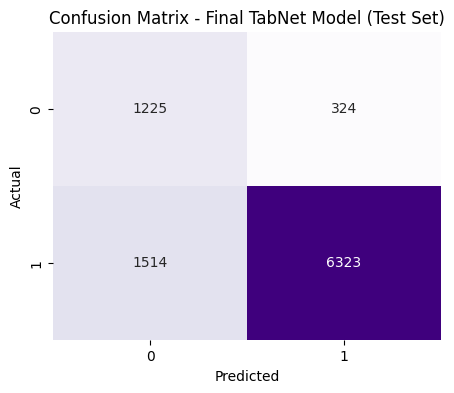

In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, confusion_matrix,
    precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

# Load the best hyperparameters
save_dir = '/content/drive/MyDrive/SEER CRC DATASET/'
best_params_path = os.path.join(save_dir, 'best_tabnet_params.json')
with open(best_params_path, 'r') as f:
    best_params = json.load(f)

print("Loaded Best Hyperparameters:")
print(json.dumps(best_params, indent=4))


# === Asumsi sudah punya: X_train, y_train, X_val, y_val, X_test, y_test ===

X_train_np, y_train_np = X_train_resampled_smoteenn.values, y_train_resampled_smoteenn.values
X_val_np, y_val_np = X_val.values, y_val.values
X_test_np, y_test_np = X_test.values, y_test.values

# === 1️⃣ K-FOLD CROSS VALIDATION DI TRAIN SET ===
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_np, y_train_np)):
    print(f"\n🟢 Training Fold {fold+1}/5")

    X_train_fold, X_val_fold = X_train_np[train_idx], X_train_np[val_idx]
    y_train_fold, y_val_fold = y_train_np[train_idx], y_train_np[val_idx]

    # Inisialisasi model baru untuk setiap fold dengan best_params
    model = TabNetClassifier(
        n_d=best_params['n_d'],
        n_a=best_params['n_a'],
        n_steps=best_params['n_steps'],
        gamma=best_params['gamma'],
        lambda_sparse=best_params['lambda_sparse'],
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=best_params['lr']), # Use best learning rate
        scheduler_params={"step_size": 50, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='entmax',
        seed=42 + fold,
        verbose=0  # taruh di sini, bukan di .fit()
    )

    # Latih model
    model.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_val_np, y_val_np)],  # validasi tetap pakai val utama
        max_epochs=200, patience=20, # Use increased epochs and patience
        batch_size=1024, virtual_batch_size=128,
        num_workers=0, drop_last=False
    )

    # Prediksi ke VAL SET utama
    y_pred_val = model.predict(X_val_np)
    y_proba_val = model.predict_proba(X_val_np)[:, 1]

    # Ambil classification report dict (macro)
    report = classification_report(y_val_np, y_pred_val, output_dict=True, zero_division=0)
    acc = accuracy_score(y_val_np, y_pred_val)
    prec_macro = report["macro avg"]["precision"]
    rec_macro = report["macro avg"]["recall"]
    f1_macro = report["macro avg"]["f1-score"]
    auc = roc_auc_score(y_val_np, y_proba_val)

    fold_metrics.append({
        'Fold': fold + 1,
        'Accuracy': acc,
        'Precision (Macro)': prec_macro,
        'Recall (Macro)': rec_macro,
        'F1 (Macro)': f1_macro,
        'ROC-AUC': auc
    })

    print(f"✅ Fold {fold+1} | Acc: {acc:.4f} | Prec_macro: {prec_macro:.4f} | "
          f"Rec_macro: {rec_macro:.4f} | F1_macro: {f1_macro:.4f} | AUC: {auc:.4f}")

# Ringkasan hasil K-Fold
cv_df = pd.DataFrame(fold_metrics)
print("\n📊 K-Fold Validation Metrics (evaluated on VAL set):")
display(cv_df)
print("\nMean Metrics:\n", cv_df.mean(numeric_only=True))

# === 2️⃣ LATIH MODEL FINAL DI TRAIN SET PENUH ===
print("\n🚀 Training Final Model on Full TRAIN SET...")
final_model = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=best_params['lr']), # Use best learning rate
    scheduler_params={"step_size": 50, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    seed=42,
    verbose=1
)

final_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    max_epochs=200, patience=20, # Use increased epochs and patience
    batch_size=1024, virtual_batch_size=128,
    num_workers=0, drop_last=False
)

# === 3️⃣ EVALUASI FINAL MODEL DI TEST SET ===
print("\n🧪 Evaluating Final Model on TEST SET...")
y_pred_test = final_model.predict(X_test_np)
y_proba_test = final_model.predict_proba(X_test_np)[:, 1]

# Ambil classification report macro
report_test = classification_report(y_test_np, y_pred_test, output_dict=True, zero_division=0)
acc = accuracy_score(y_test_np, y_pred_test)
prec_macro = report_test["macro avg"]["precision"]
rec_macro = report_test["macro avg"]["recall"]
f1_macro = report_test["macro avg"]["f1-score"]
auc = roc_auc_score(y_test_np, y_proba_test)

print(f"\n✅ Final Test Metrics (Macro):")
print(f"Accuracy : {acc:.4f}")
print(f"Precision (Macro): {prec_macro:.4f}")
print(f"Recall (Macro)   : {rec_macro:.4f}")
print(f"F1-Score (Macro) : {f1_macro:.4f}")
print(f"ROC-AUC          : {auc:.4f}")

# === 4️⃣ CLASSIFICATION REPORT (lengkap) ===
print("\n📋 Classification Report (TEST SET):")
print(classification_report(y_test_np, y_pred_test, digits=4, zero_division=0))

# === 5️⃣ CONFUSION MATRIX ===
cm = confusion_matrix(y_test_np, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Final TabNet Model (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.metrics import auc, precision_recall_curve


from sklearn.metrics import auc, precision_recall_curve, roc_auc_score, f1_score, recall_score
import numpy as np

def bootstrap_ci(y_true, y_pred, y_proba, n_bootstraps=2000, alpha=0.95):

    rng = np.random.RandomState(42)

    auc_scores = []
    f1_scores = []
    recall_dead = []      # kelas 0
    pr_auc_dead = []      # kelas 0
    pr_auc_alive = []     # kelas 1

    for _ in range(n_bootstraps):
        # Bootstrap sampling
        idx = rng.choice(len(y_true), len(y_true), replace=True)

        y_true_bs = y_true[idx]
        y_pred_bs = y_pred[idx]
        y_proba_bs = y_proba[idx]

        # AUC
        try:
            auc_scores.append(roc_auc_score(y_true_bs, y_proba_bs))
        except:
            pass

        # F1-macro
        f1_scores.append(f1_score(y_true_bs, y_pred_bs, average='macro', zero_division=0))

        # Recall kelas 0 (Dead)
        recall_dead.append(recall_score(y_true_bs, y_pred_bs, pos_label=0))

        # PR-AUC kelas 0 (Dead)
        # KOREKSI: Gunakan probabilitas kelas 0 (1 - y_proba_bs)
        p0, r0, _ = precision_recall_curve(y_true_bs, 1 - y_proba_bs, pos_label=0)
        pr_auc_dead.append(auc(r0, p0))

        # PR-AUC kelas 1 (Alive)
        # BENAR: Gunakan probabilitas kelas 1 (y_proba_bs)
        p1, r1, _ = precision_recall_curve(y_true_bs, y_proba_bs, pos_label=1)
        pr_auc_alive.append(auc(r1, p1))

    def CI(arr):
        low = np.percentile(arr, ((1 - alpha) / 2) * 100)
        high = np.percentile(arr, (alpha + (1 - alpha)/2) * 100)
        return (low, high)

    return {
        "AUC_CI": CI(auc_scores),
        "F1_macro_CI": CI(f1_scores),
        "Recall_dead_CI": CI(recall_dead),
        "PR_AUC_dead_CI": CI(pr_auc_dead),
        "PR_AUC_alive_CI": CI(pr_auc_alive)
    }


# === 6️⃣ HITUNG 95% CONFIDENCE INTERVAL (BOOTSTRAP) ===
print("\n📦 Bootstrapping 95% Confidence Intervals (AUC, F1, Recall kelas 0, PR-AUC)...")

y_true = y_test_np
y_pred = y_pred_test
y_proba = y_proba_test

ci = bootstrap_ci(y_test_np, y_pred_test, y_proba_test, n_bootstraps=2000)

print("\n===== 95% Confidence Intervals =====")
print(f"AUC               95% CI : {ci['AUC_CI'][0]:.4f} – {ci['AUC_CI'][1]:.4f}")
print(f"F1 Macro          95% CI : {ci['F1_macro_CI'][0]:.4f} – {ci['F1_macro_CI'][1]:.4f}")
print(f"Recall Dead       95% CI : {ci['Recall_dead_CI'][0]:.4f} – {ci['Recall_dead_CI'][1]:.4f}")

print(f"PR-AUC Dead       95% CI : {ci['PR_AUC_dead_CI'][0]:.4f} – {ci['PR_AUC_dead_CI'][1]:.4f}")
print(f"PR-AUC Alive      95% CI : {ci['PR_AUC_alive_CI'][0]:.4f} – {ci['PR_AUC_alive_CI'][1]:.4f}")


📦 Bootstrapping 95% Confidence Intervals (AUC, F1, Recall kelas 0, PR-AUC)...

===== 95% Confidence Intervals =====
AUC               95% CI : 0.8693 – 0.8879
F1 Macro          95% CI : 0.7113 – 0.7334
Recall Dead       95% CI : 0.7703 – 0.8113
PR-AUC Dead       95% CI : 0.5845 – 0.6357
PR-AUC Alive      95% CI : 0.9675 – 0.9738



📊 Melakukan Analisis Tambahan (Calibration & DCA)...
✅ Brier Score: 0.1503


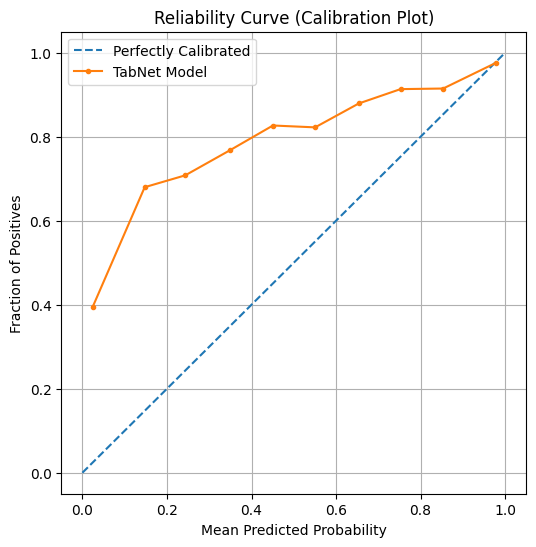

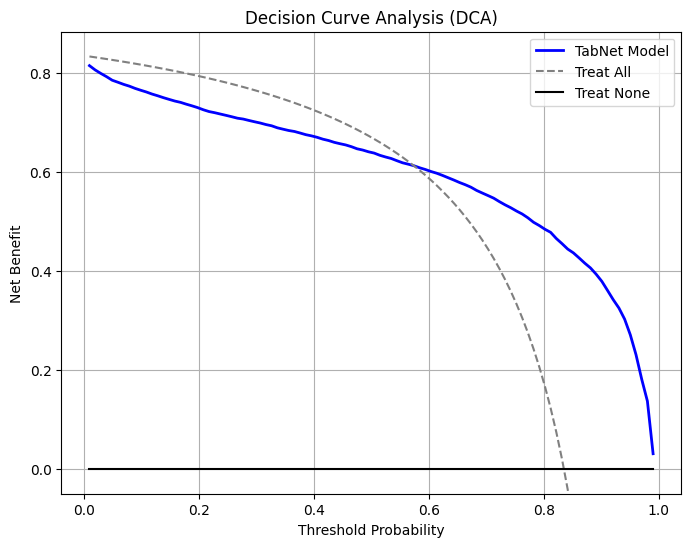

In [ ]:
# === 6️⃣ TAMBAHAN EVALUASI UNTUK REVIEWER (Calibration & DCA) ===
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

print("\n📊 Melakukan Analisis Tambahan (Calibration & DCA)...")

# --- 1. Brier Score (Semakin kecil semakin baik) ---
# Mengukur seberapa akurat probabilitas prediksi (kalibrasi)
brier = brier_score_loss(y_test_np, y_proba_test)
print(f"✅ Brier Score: {brier:.4f}")

# --- 2. Reliability Curve (Calibration Plot) ---
plt.figure(figsize=(6, 6))
prob_true, prob_pred = calibration_curve(y_test_np, y_proba_test, n_bins=10, strategy='uniform')

# Plot kurva ideal (perfectly calibrated)
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
# Plot kurva model Anda
plt.plot(prob_pred, prob_true, marker='.', label='TabNet Model')

plt.title("Reliability Curve (Calibration Plot)")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.grid(True)
plt.show()

# --- 3. Decision Curve Analysis (DCA) ---
# Fungsi manual untuk menghitung Net Benefit (karena sklearn tidak punya bawaan)
def calculate_net_benefit_model(y_true, y_prob, thresholds):
    net_benefits = []
    for thresh in thresholds:
        # Hitung prediksi berdasarkan threshold
        y_pred_thresh = (y_prob >= thresh).astype(int)

        tp = np.sum((y_true == 1) & (y_pred_thresh == 1))
        fp = np.sum((y_true == 0) & (y_pred_thresh == 1))
        n = len(y_true)

        if thresh == 1.0:
            nb = 0
        else:
            # Rumus Net Benefit
            nb = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_benefits.append(nb)
    return np.array(net_benefits)

def calculate_net_benefit_all(y_true, thresholds):
    # Strategi "Treat All": Asumsikan semua orang positif (berisiko)
    net_benefits = []
    n = len(y_true)
    prevalence = np.sum(y_true == 1) / n

    for thresh in thresholds:
        if thresh == 1.0:
            nb = 0
        else:
            nb = prevalence - (1 - prevalence) * (thresh / (1 - thresh))
        net_benefits.append(nb)
    return np.array(net_benefits)

# Setup Thresholds
thresholds = np.linspace(0.01, 0.99, 100)

# Hitung Net Benefit
nb_model = calculate_net_benefit_model(y_test_np, y_proba_test, thresholds)
nb_all = calculate_net_benefit_all(y_test_np, thresholds)
nb_none = np.zeros(len(thresholds)) # Strategi "Treat None" selalu 0

# Plot DCA
plt.figure(figsize=(8, 6))
plt.plot(thresholds, nb_model, label='TabNet Model', color='blue', linewidth=2)
plt.plot(thresholds, nb_all, label='Treat All', color='gray', linestyle='--')
plt.plot(thresholds, nb_none, label='Treat None', color='black', linestyle='-')

plt.title("Decision Curve Analysis (DCA)")
plt.xlabel("Threshold Probability")
plt.ylabel("Net Benefit")
plt.ylim(bottom=-0.05, top=max(nb_all.max(), nb_model.max()) + 0.05) # Zoom biar jelas
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Default TabNet Model Parameters:")
params = final_model.get_params()
for param, value in params.items():
    print(f"- {param}: {value}")

Default TabNet Model Parameters:
- cat_dims: []
- cat_emb_dim: []
- cat_idxs: []
- clip_value: 1
- device_name: auto
- epsilon: 1e-15
- gamma: 1.3
- grouped_features: []
- input_dim: 32
- lambda_sparse: 0.001
- mask_type: entmax
- momentum: 0.02
- n_a: 8
- n_d: 8
- n_indep_decoder: 1
- n_independent: 2
- n_shared: 2
- n_shared_decoder: 1
- n_steps: 3
- optimizer_fn: <class 'torch.optim.adam.Adam'>
- optimizer_params: {'lr': 0.02}
- output_dim: 2
- scheduler_fn: <class 'torch.optim.lr_scheduler.StepLR'>
- scheduler_params: {'step_size': 50, 'gamma': 0.9}
- seed: 42
- verbose: 1


#Interpret


In [ ]:
# Inspect the available methods of the final_tabnet_model
print(dir(final_model))

['__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__post_init__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__str__', '__subclasshook__', '__update__', '__weakref__', '_build_request_for_signature', '_callback_container', '_check_feature_names', '_check_n_features', '_compute_feature_importances', '_construct_loaders', '_default_loss', '_default_metric', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_metric_container_dict', '_metrics', '_metrics_names', '_more_tags', '_optimizer', '_predict_batch',

In [ ]:
# Interpret the TabNet model globally and locally
explain_matrix, masks = final_model.explain(X_test_np)

# Global interpretation (mean importance across all masks)
global_importance = masks[0].mean(axis=0)  # Assuming mask index 0 for global interpretation
feature_names = X_test.columns
global_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': global_importance
})
global_importance_df = global_importance_df.sort_values(by='Importance', ascending=False)

print("Global Feature Importance (Mean Importance across all masks):")
display(global_importance_df)

# Local interpretation (example for the first few test samples)
print("\nLocal Feature Importance (for the first 5 test samples):")
for i in range(5):
    print(f"\nSample {i+1}:")
    local_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': explain_matrix[i]
    })
    local_importance_df = local_importance_df.sort_values(by='Importance', ascending=False)
    display(local_importance_df)

Global Feature Importance (Mean Importance across all masks):


Feature  Importance
5                                      Primary Site    0.099612
30                           Grade Clinical (2018+)    0.094019
20                Derived EOD 2018 N Recode (2018+)    0.086894
22                 EOD Primary Tumor Recode (2018+)    0.081345
13                            RX Summ--Surg/Rad Seq    0.081244
31                       Tumor Size Summary (2016+)    0.075233
24                          EOD Mets Recode (2018+)    0.061680
0                                      Age (15-90+)    0.054623
15                  Regional nodes positive (1988+)    0.047164
7                             Behavior code ICD-O-3    0.044119
6                           Histologic Type ICD-O-3    0.036808
3                                 Year of diagnosis    0.034490
19                Derived EOD 2018 T Recode (2018+)    0.032147
21                Derived EOD 2018 M Recode (2018+)    0.022292
9                 Chemotherapy recode (yes, no/unk)    0.018144
1                 Race recode (White, Black, Other)    0.017115
27                First malignant primary indicator    0.016506
8                           Diagnostic Confirmation    0.015655
16            SEER Combined Mets at DX-bone (2010+)    0.013314
26                       Rural-Urban Continuum Code    0.010368
23                EOD Regional Nodes Recode (2018+)    0.010305
17           SEER Combined Mets at DX-liver (2010+)    0.010142
28      Derived EOD 2018 Stage Group Recode (2018+)    0.009587
2                                               Sex    0.007043
11               Derived Summary Grade 2018 (2018+)    0.005104
14  Time from diagnosis to treatment in days recode    0.004835
29                       Grade Pathological (2018+)    0.004325
12                  RX Summ--Surg Prim Site (1998+)    0.001892
4                       Marital status at diagnosis    0.001281
10                                 Radiation recode    0.001115
25    Median household income inflation adj to 2023    0.000980
18            SEER Combined Mets at DX-lung (2010+)    0.000620


Local Feature Importance (for the first 5 test samples):

Sample 1:


Feature  Importance
20                Derived EOD 2018 N Recode (2018+)    4.912953
5                                      Primary Site    3.740501
3                                 Year of diagnosis    3.388515
14  Time from diagnosis to treatment in days recode    2.425152
12                  RX Summ--Surg Prim Site (1998+)    1.692638
24                          EOD Mets Recode (2018+)    1.560874
9                 Chemotherapy recode (yes, no/unk)    1.443552
28      Derived EOD 2018 Stage Group Recode (2018+)    1.365024
6                           Histologic Type ICD-O-3    1.331284
0                                      Age (15-90+)    1.196843
10                                 Radiation recode    0.963996
22                 EOD Primary Tumor Recode (2018+)    0.837297
7                             Behavior code ICD-O-3    0.781280
11               Derived Summary Grade 2018 (2018+)    0.776139
15                  Regional nodes positive (1988+)    0.555247
16            SEER Combined Mets at DX-bone (2010+)    0.528434
13                            RX Summ--Surg/Rad Seq    0.502104
17           SEER Combined Mets at DX-liver (2010+)    0.489884
19                Derived EOD 2018 T Recode (2018+)    0.472643
29                       Grade Pathological (2018+)    0.426953
27                First malignant primary indicator    0.339631
25    Median household income inflation adj to 2023    0.224748
4                       Marital status at diagnosis    0.193930
23                EOD Regional Nodes Recode (2018+)    0.072388
21                Derived EOD 2018 M Recode (2018+)    0.046533
31                       Tumor Size Summary (2016+)    0.028113
30                           Grade Clinical (2018+)    0.018231
18            SEER Combined Mets at DX-lung (2010+)    0.000778
8                           Diagnostic Confirmation    0.000114
1                 Race recode (White, Black, Other)    0.000000
2                                               Sex    0.000000
26                       Rural-Urban Continuum Code    0.000000


Sample 2:


Feature  Importance
9                 Chemotherapy recode (yes, no/unk)    1.513338
0                                      Age (15-90+)    1.477309
15                  Regional nodes positive (1988+)    1.356233
20                Derived EOD 2018 N Recode (2018+)    1.263052
14  Time from diagnosis to treatment in days recode    1.221758
28      Derived EOD 2018 Stage Group Recode (2018+)    1.031886
3                                 Year of diagnosis    0.890243
22                 EOD Primary Tumor Recode (2018+)    0.874703
27                First malignant primary indicator    0.833778
12                  RX Summ--Surg Prim Site (1998+)    0.826197
19                Derived EOD 2018 T Recode (2018+)    0.806035
24                          EOD Mets Recode (2018+)    0.698239
21                Derived EOD 2018 M Recode (2018+)    0.585457
30                           Grade Clinical (2018+)    0.469724
6                           Histologic Type ICD-O-3    0.376853
25    Median household income inflation adj to 2023    0.328854
31                       Tumor Size Summary (2016+)    0.320648
5                                      Primary Site    0.247422
11               Derived Summary Grade 2018 (2018+)    0.167875
2                                               Sex    0.126747
23                EOD Regional Nodes Recode (2018+)    0.103261
16            SEER Combined Mets at DX-bone (2010+)    0.095775
17           SEER Combined Mets at DX-liver (2010+)    0.060865
4                       Marital status at diagnosis    0.052311
10                                 Radiation recode    0.050147
13                            RX Summ--Surg/Rad Seq    0.044145
1                 Race recode (White, Black, Other)    0.022987
29                       Grade Pathological (2018+)    0.022269
26                       Rural-Urban Continuum Code    0.018369
18            SEER Combined Mets at DX-lung (2010+)    0.016130
8                           Diagnostic Confirmation    0.005950
7                             Behavior code ICD-O-3    0.000695


Sample 3:


Feature  Importance
20                Derived EOD 2018 N Recode (2018+)    1.988366
22                 EOD Primary Tumor Recode (2018+)    1.924475
3                                 Year of diagnosis    1.827608
12                  RX Summ--Surg Prim Site (1998+)    1.468311
24                          EOD Mets Recode (2018+)    1.004248
11               Derived Summary Grade 2018 (2018+)    1.003673
23                EOD Regional Nodes Recode (2018+)    0.882282
9                 Chemotherapy recode (yes, no/unk)    0.847798
0                                      Age (15-90+)    0.805548
14  Time from diagnosis to treatment in days recode    0.685454
28      Derived EOD 2018 Stage Group Recode (2018+)    0.658575
16            SEER Combined Mets at DX-bone (2010+)    0.652467
17           SEER Combined Mets at DX-liver (2010+)    0.613580
15                  Regional nodes positive (1988+)    0.565512
21                Derived EOD 2018 M Recode (2018+)    0.435358
19                Derived EOD 2018 T Recode (2018+)    0.312349
4                       Marital status at diagnosis    0.295183
26                       Rural-Urban Continuum Code    0.191484
25    Median household income inflation adj to 2023    0.144437
30                           Grade Clinical (2018+)    0.137043
31                       Tumor Size Summary (2016+)    0.129266
10                                 Radiation recode    0.129235
27                First malignant primary indicator    0.099409
6                           Histologic Type ICD-O-3    0.083713
7                             Behavior code ICD-O-3    0.062336
2                                               Sex    0.048995
29                       Grade Pathological (2018+)    0.002504
5                                      Primary Site    0.000000
13                            RX Summ--Surg/Rad Seq    0.000000
8                           Diagnostic Confirmation    0.000000
1                 Race recode (White, Black, Other)    0.000000
18            SEER Combined Mets at DX-lung (2010+)    0.000000


Sample 4:


Feature  Importance
19                Derived EOD 2018 T Recode (2018+)    2.547245
12                  RX Summ--Surg Prim Site (1998+)    1.564453
0                                      Age (15-90+)    1.539582
24                          EOD Mets Recode (2018+)    1.443215
28      Derived EOD 2018 Stage Group Recode (2018+)    1.442227
22                 EOD Primary Tumor Recode (2018+)    1.430668
9                 Chemotherapy recode (yes, no/unk)    1.273480
3                                 Year of diagnosis    1.213582
14  Time from diagnosis to treatment in days recode    1.183255
27                First malignant primary indicator    0.965248
15                  Regional nodes positive (1988+)    0.788063
20                Derived EOD 2018 N Recode (2018+)    0.719394
21                Derived EOD 2018 M Recode (2018+)    0.380937
13                            RX Summ--Surg/Rad Seq    0.330524
31                       Tumor Size Summary (2016+)    0.320936
11               Derived Summary Grade 2018 (2018+)    0.292484
17           SEER Combined Mets at DX-liver (2010+)    0.272271
16            SEER Combined Mets at DX-bone (2010+)    0.267399
6                           Histologic Type ICD-O-3    0.177988
29                       Grade Pathological (2018+)    0.112918
10                                 Radiation recode    0.111372
2                                               Sex    0.087236
25    Median household income inflation adj to 2023    0.038591
23                EOD Regional Nodes Recode (2018+)    0.036548
4                       Marital status at diagnosis    0.022729
1                 Race recode (White, Black, Other)    0.022674
26                       Rural-Urban Continuum Code    0.020486
5                                      Primary Site    0.015791
7                             Behavior code ICD-O-3    0.013120
30                           Grade Clinical (2018+)    0.000491
8                           Diagnostic Confirmation    0.000210
18            SEER Combined Mets at DX-lung (2010+)    0.000003


Sample 5:


Feature  Importance
30                           Grade Clinical (2018+)    4.776316
11               Derived Summary Grade 2018 (2018+)    2.171612
3                                 Year of diagnosis    1.796229
24                          EOD Mets Recode (2018+)    1.565355
28      Derived EOD 2018 Stage Group Recode (2018+)    1.446322
5                                      Primary Site    1.379024
22                 EOD Primary Tumor Recode (2018+)    1.211666
4                       Marital status at diagnosis    1.150516
15                  Regional nodes positive (1988+)    1.060850
0                                      Age (15-90+)    1.009177
12                  RX Summ--Surg Prim Site (1998+)    0.909468
14  Time from diagnosis to treatment in days recode    0.728247
9                 Chemotherapy recode (yes, no/unk)    0.708462
26                       Rural-Urban Continuum Code    0.523108
21                Derived EOD 2018 M Recode (2018+)    0.480846
20                Derived EOD 2018 N Recode (2018+)    0.445474
19                Derived EOD 2018 T Recode (2018+)    0.318658
17           SEER Combined Mets at DX-liver (2010+)    0.198193
31                       Tumor Size Summary (2016+)    0.178457
16            SEER Combined Mets at DX-bone (2010+)    0.169961
10                                 Radiation recode    0.072430
27                First malignant primary indicator    0.049512
23                EOD Regional Nodes Recode (2018+)    0.035693
25    Median household income inflation adj to 2023    0.019584
7                             Behavior code ICD-O-3    0.009326
2                                               Sex    0.002906
6                           Histologic Type ICD-O-3    0.001578
1                 Race recode (White, Black, Other)    0.000161
13                            RX Summ--Surg/Rad Seq    0.000000
8                           Diagnostic Confirmation    0.000000
18            SEER Combined Mets at DX-lung (2010+)    0.000000
29                       Grade Pathological (2018+)    0.000000

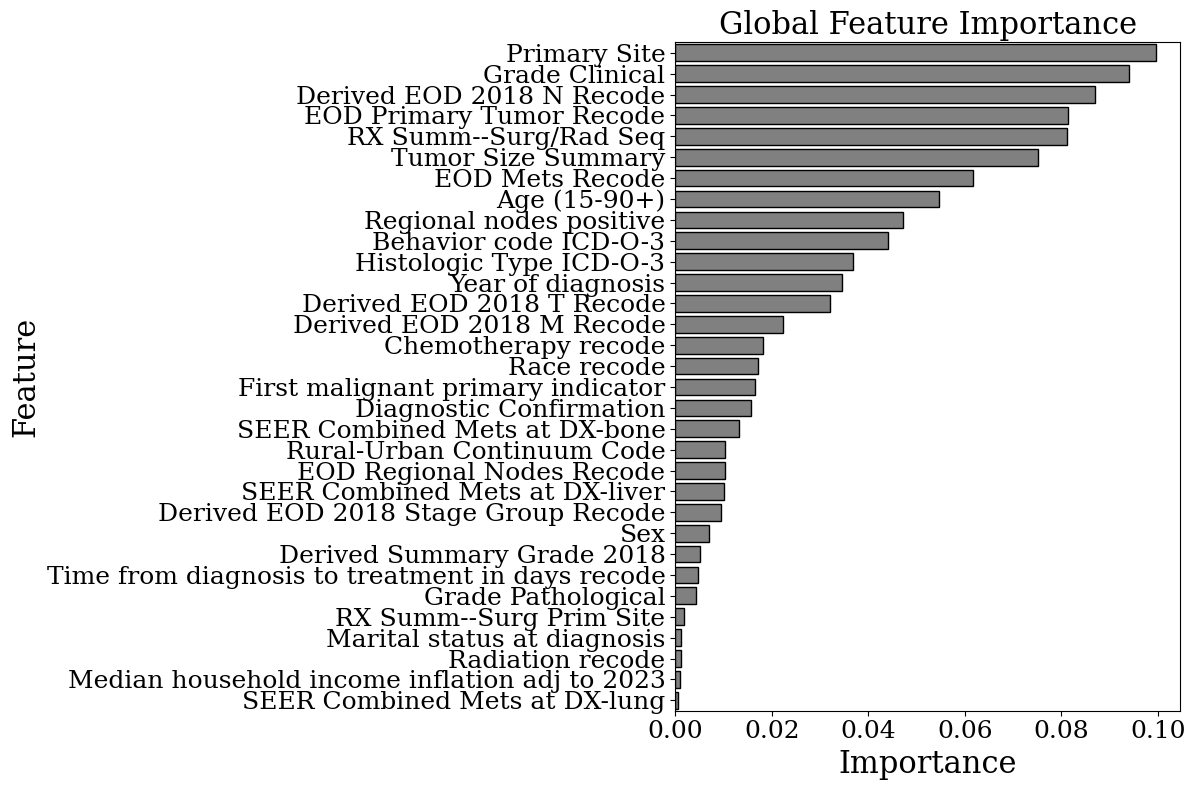


📊 Local Feature Importance Plots (for the first 5 test samples):


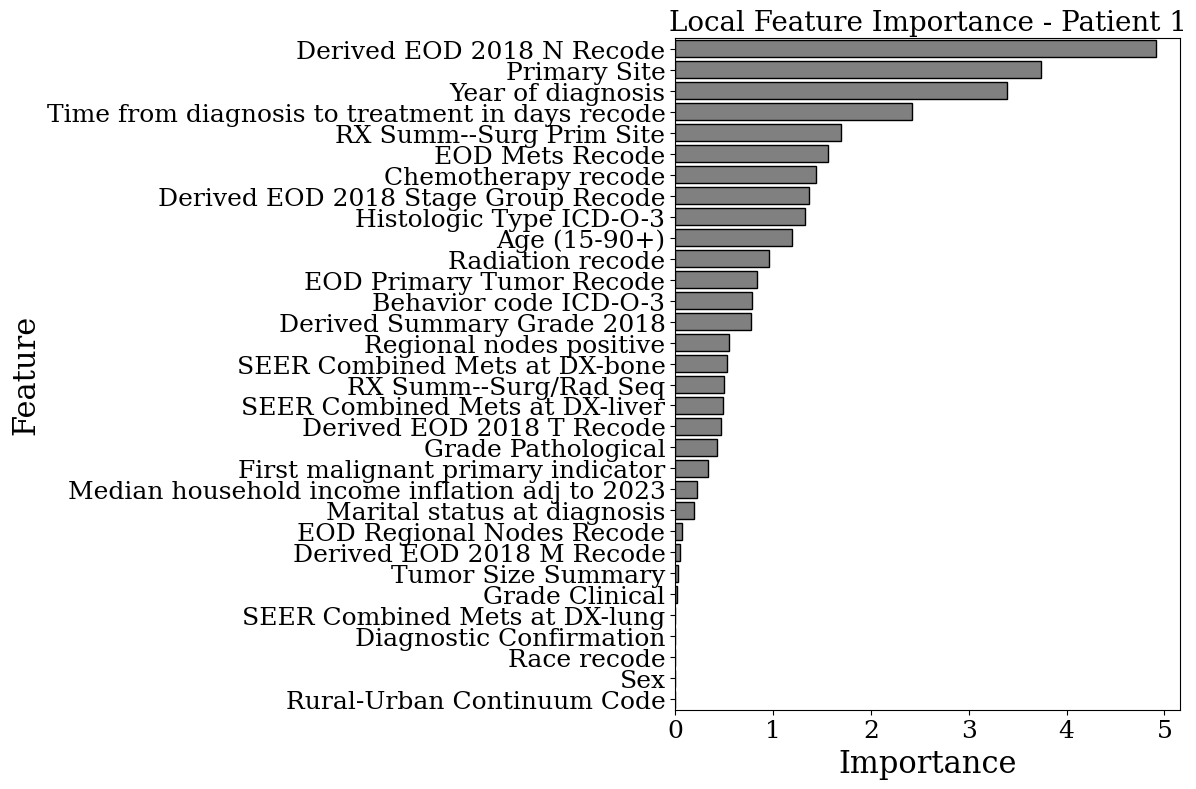

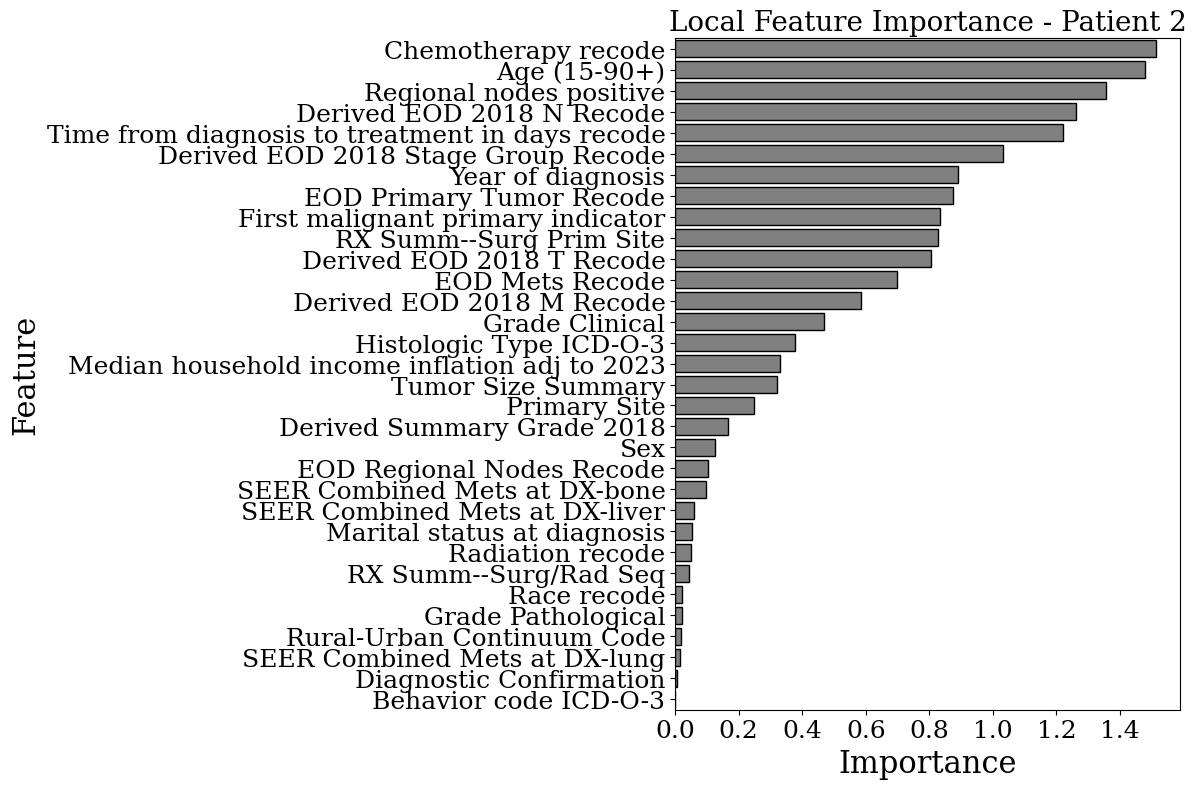

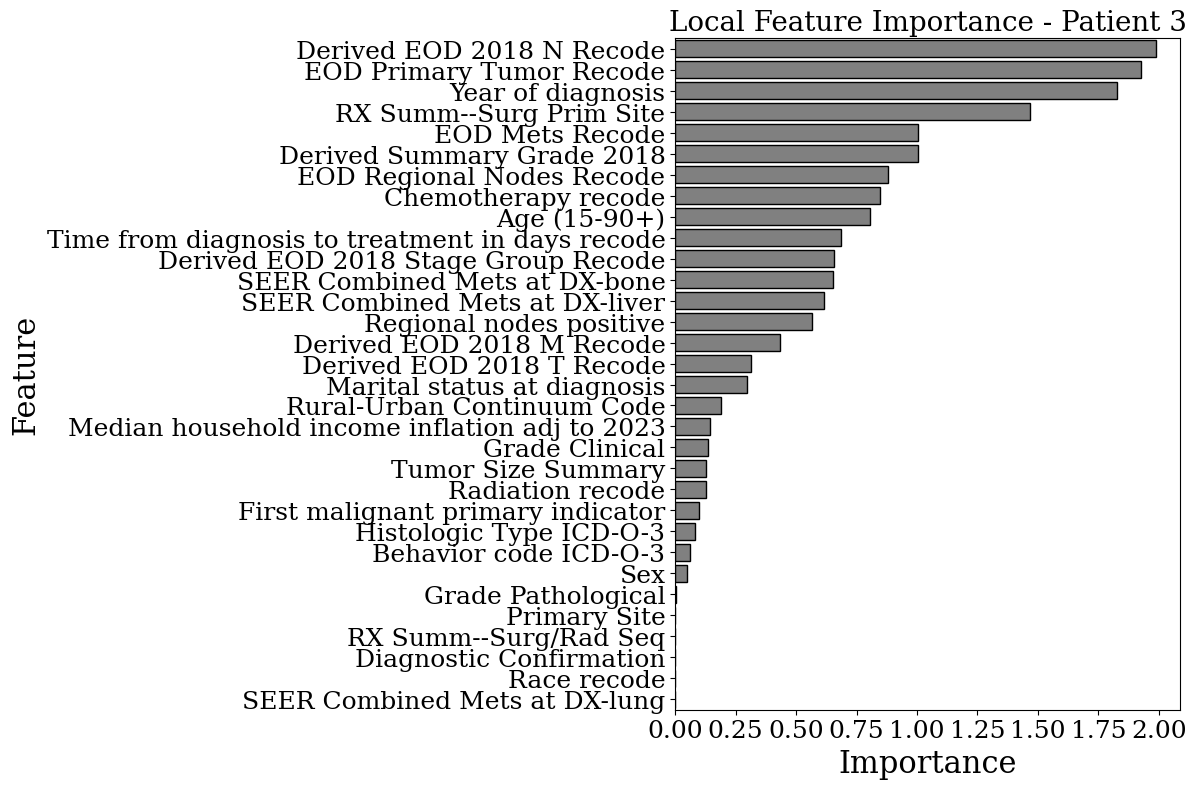

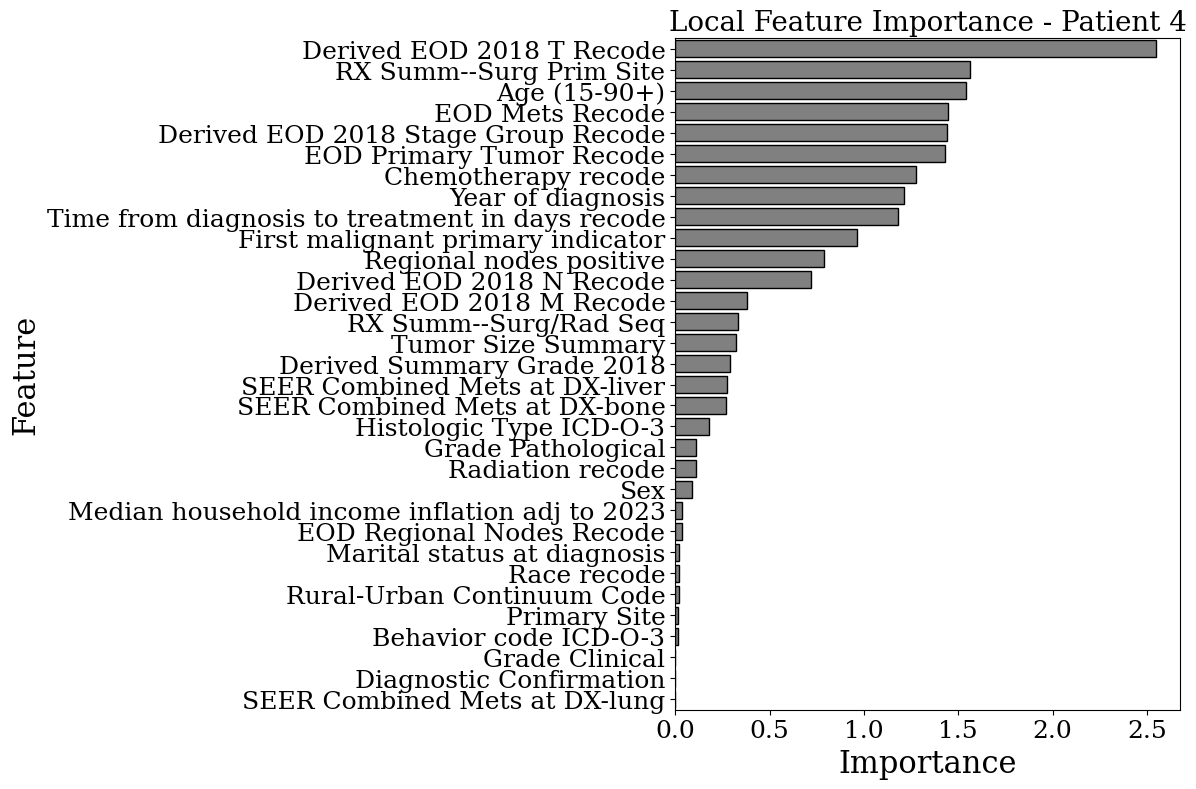

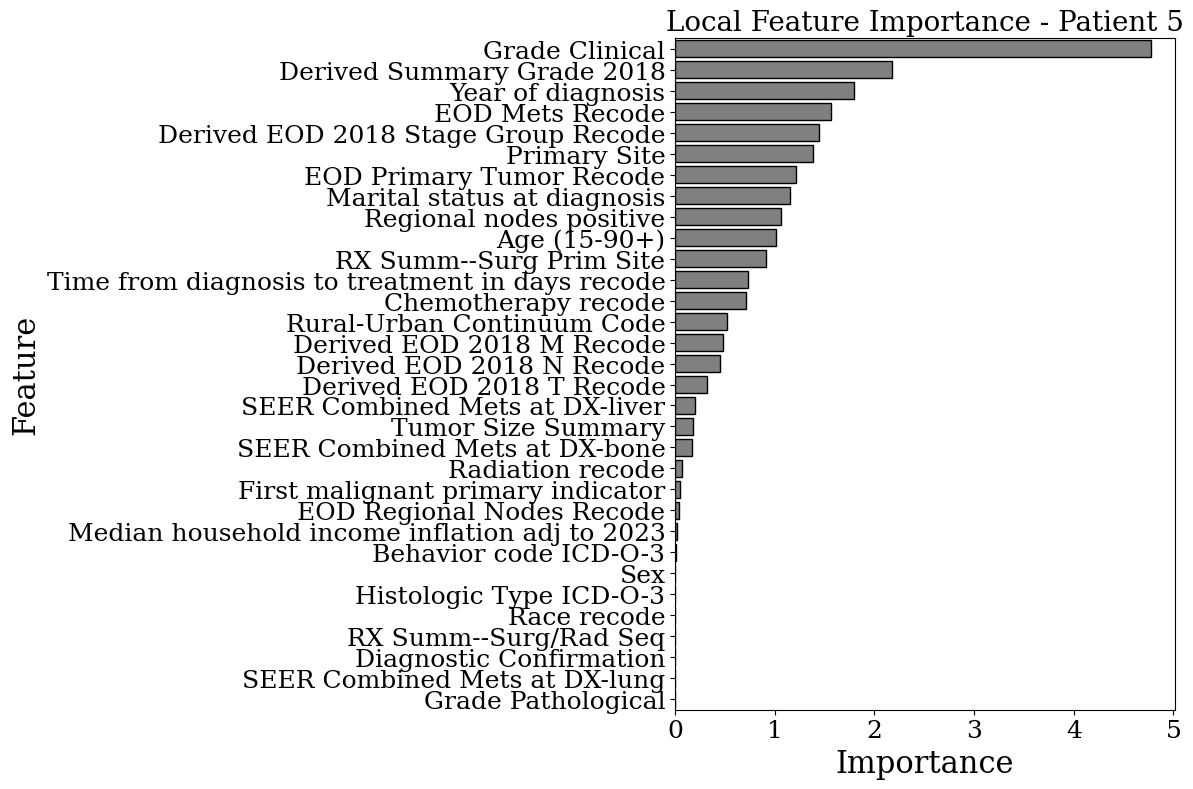

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re  # untuk hapus teks dalam tanda kurung

# 💡 Font mirip LaTeX tanpa aktifkan LaTeX engine
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern", "Times New Roman", "DejaVu Serif"],
    "mathtext.fontset": "cm",
    "axes.unicode_minus": False
})

# === Global Feature Importance ===
explain_matrix, masks = final_model.explain(X_test.values)
feature_names = X_test.columns

# --- Bersihkan nama fitur (hapus teks dalam tanda kurung, kecuali Age) ---
cleaned_feature_names = []
for name in feature_names:
    if name == 'Age (15-90+)':
        cleaned_feature_names.append(name)
    else:
        cleaned_name = re.sub(r'\s*\([^)]*\)', '', name)
        cleaned_feature_names.append(cleaned_name)
# --- Selesai membersihkan ---

global_importance = masks[0].mean(axis=0)
global_importance_df = pd.DataFrame({
    'Feature': cleaned_feature_names,
    'Importance': global_importance
}).sort_values(by='Importance', ascending=False)

# === Plot Global Feature Importance (MONOKROM) ===
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=global_importance_df,
    color='gray',     # 🔹 Semua bar warna abu netral
    edgecolor='black' # 🔹 Garis tepi hitam agar tegas
)

plt.title(r'Global Feature Importance', fontsize=22)
plt.xlabel(r'Importance', fontsize=22)
plt.ylabel(r'Feature', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

# === Local Feature Importance (Top 5 Samples) ===
print("\n📊 Local Feature Importance Plots (for the first 5 test samples):")
for i in range(5):
    local_importance_df = pd.DataFrame({
        'Feature': cleaned_feature_names,
        'Importance': explain_matrix[i]
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(
        x='Importance',
        y='Feature',
        data=local_importance_df,
        color='gray',      # 🔹 Monokrom
        edgecolor='black'  # 🔹 Outline hitam
    )

    plt.title(rf'Local Feature Importance - Patient {i+1}', fontsize=20)
    plt.xlabel(r'Importance', fontsize=22)
    plt.ylabel(r'Feature', fontsize=22)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    plt.show()

Jumlah decision steps: 6
Shape mask[0]: (9386, 32) (samples × features)


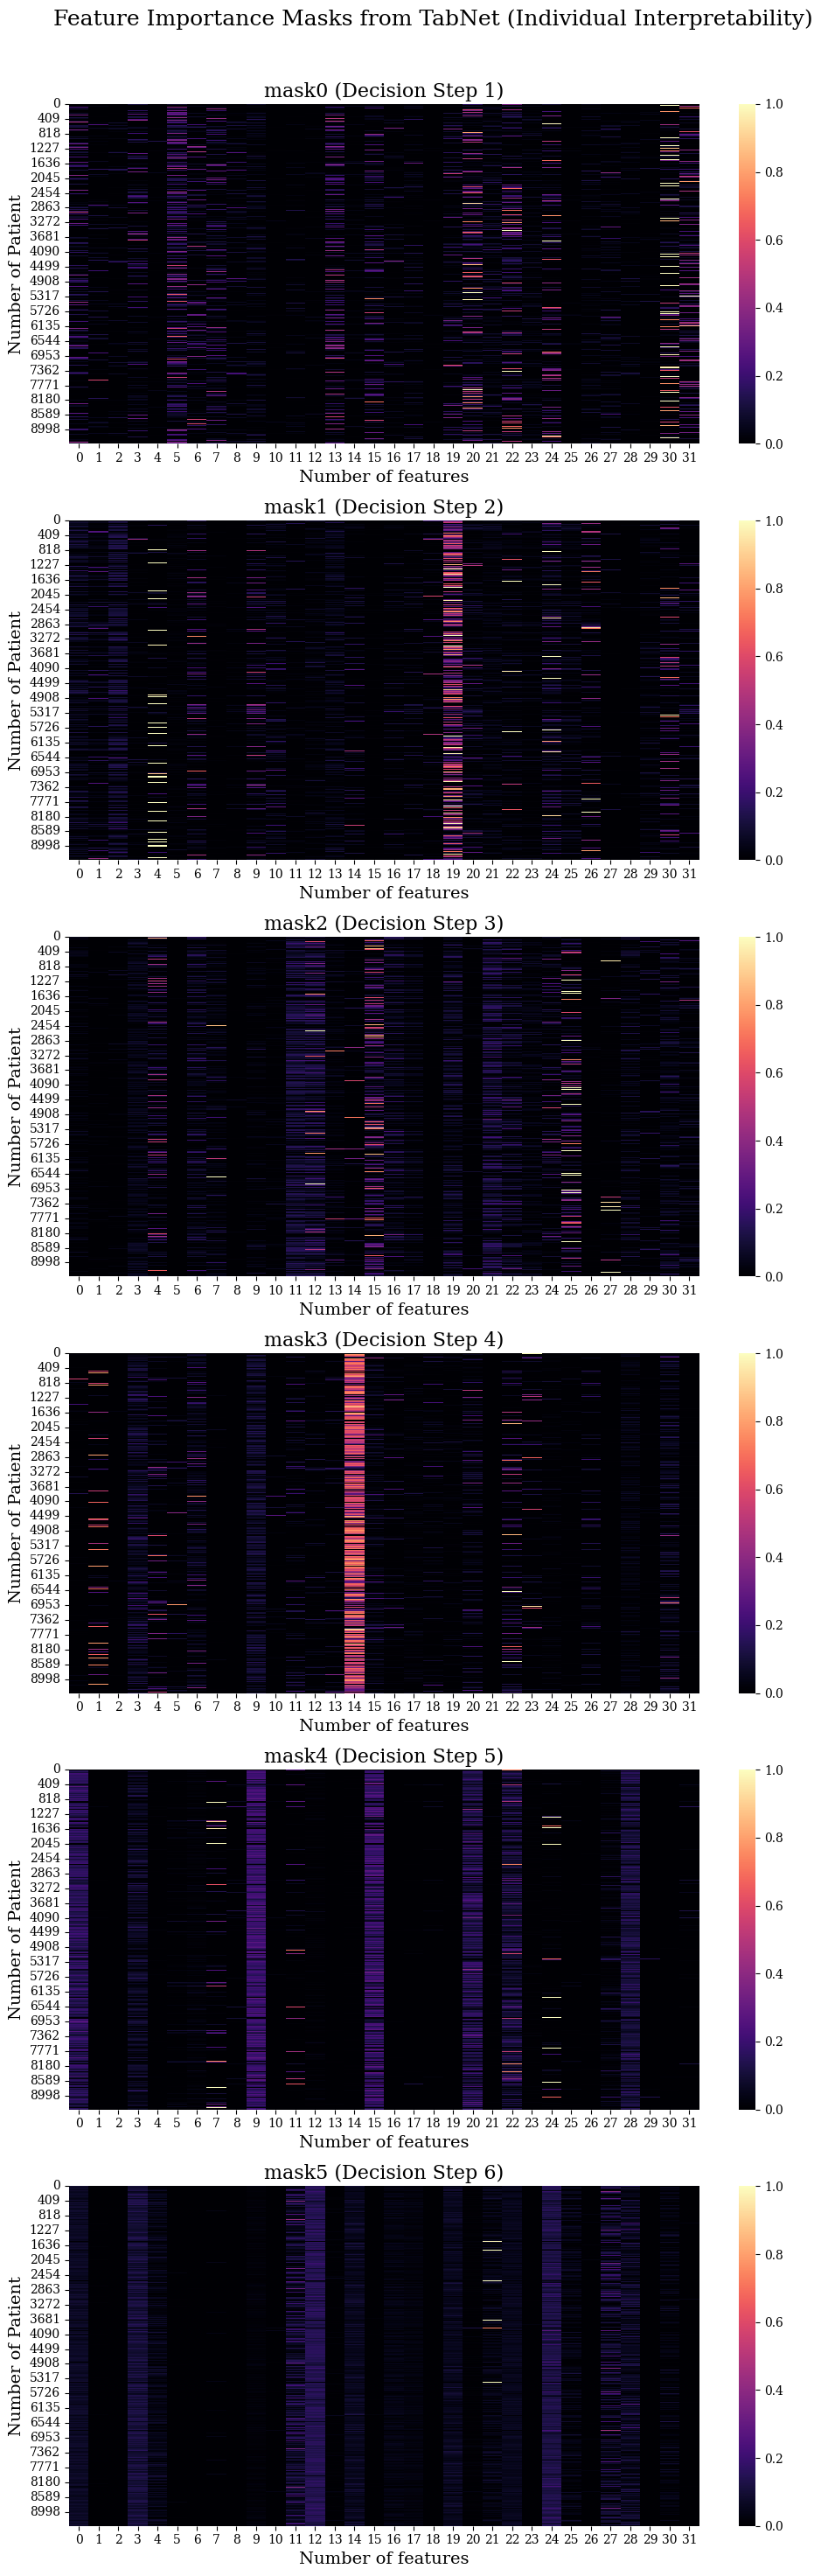

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ============================================================
# 1️⃣ Dapatkan explain matrix & masks dari model TabNet
# ============================================================
explain_matrix, masks = final_model.explain(X_test.values)

# explain_matrix → importance agregat tiap sample
# masks → importance tiap decision step (list of arrays)
print(f"Jumlah decision steps: {len(masks)}")
print(f"Shape mask[0]: {masks[0].shape} (samples × features)")

# ============================================================
# 2️⃣ Visualisasi Feature Masks
# ============================================================
num_masks_to_plot = min(6, len(masks))  # tampilkan 3 step pertama (atau sesuai)
fig, axes = plt.subplots(num_masks_to_plot, 1, figsize=(10, 5 * num_masks_to_plot))

# palet warna sesuai paper (gradasi ungu → kuning)
cmap = plt.cm.magma  # atau 'plasma', 'inferno', atau colormap custom kalau mau serupa

for i in range(num_masks_to_plot):
    ax = axes[i] if num_masks_to_plot > 1 else axes
    sns.heatmap(
        masks[i],
        cmap=cmap,
        cbar=True,
        ax=ax
    )
    ax.set_title(f"mask{i} (Decision Step {i+1})", fontsize=16)
    ax.set_xlabel("Number of features", fontsize=14)
    ax.set_ylabel("Number of Patient", fontsize=14)

plt.suptitle("Feature Importance Masks from TabNet (Individual Interpretability)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [ ]:
# Display the mapping of feature indices to their cleaned names
print("\n--- Feature Index to Feature Name Mapping ---")
for i, feature_name in enumerate(cleaned_feature_names):
    print(f"{i}: {feature_name}")



--- Feature Index to Feature Name Mapping ---
0: Age (15-90+)
1: Race recode
2: Sex
3: Year of diagnosis
4: Marital status at diagnosis
5: Primary Site
6: Histologic Type ICD-O-3
7: Behavior code ICD-O-3
8: Diagnostic Confirmation
9: Chemotherapy recode
10: Radiation recode
11: Derived Summary Grade 2018
12: RX Summ--Surg Prim Site
13: RX Summ--Surg/Rad Seq
14: Time from diagnosis to treatment in days recode
15: Regional nodes positive
16: SEER Combined Mets at DX-bone
17: SEER Combined Mets at DX-liver
18: SEER Combined Mets at DX-lung
19: Derived EOD 2018 T Recode
20: Derived EOD 2018 N Recode
21: Derived EOD 2018 M Recode
22: EOD Primary Tumor Recode
23: EOD Regional Nodes Recode
24: EOD Mets Recode
25: Median household income inflation adj to 2023
26: Rural-Urban Continuum Code
27: First malignant primary indicator
28: Derived EOD 2018 Stage Group Recode
29: Grade Pathological
30: Grade Clinical
31: Tumor Size Summary


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

# Assuming `final_model`, `X_test`, and `masks` are available from previous cells
# Re-create cleaned_feature_names to ensure consistency
feature_names = X_test.columns
cleaned_feature_names = []
for name in feature_names:
    if name == 'Age (15-90+)':
        cleaned_feature_names.append(name)
    else:
        cleaned_name = re.sub(r'\s*\([^)]*\)', '', name)
        cleaned_feature_names.append(cleaned_name)

print("\n--- Feature Importance per Decision Step (Mask) ---")

# Iterate through the items of the masks dictionary
for i, mask_array in masks.items():
    # Calculate mean importance across all samples for the current mask
    mask_importance = mask_array.mean(axis=0)

    # Create a DataFrame for this mask's feature importance
    mask_importance_df = pd.DataFrame({
        'Feature': cleaned_feature_names,
        'Importance': mask_importance
    }).sort_values(by='Importance', ascending=False)

    print(f"\n📊 Top 5 Features for Mask {i+1} (Decision Step {i+1}):")
    display(mask_importance_df.head(5))

    # Optional: Plotting for each mask (can be uncommented if individual plots are desired)
    # plt.figure(figsize=(10, 6))
    # sns.barplot(x='Importance', y='Feature', data=mask_importance_df.head(10), color='skyblue')
    # plt.title(f'Top 10 Feature Importance for Mask {i+1}')
    # plt.xlabel('Importance')
    # plt.ylabel('Feature')
    # plt.tight_layout()
    # plt.show()



--- Feature Importance per Decision Step (Mask) ---

📊 Top 5 Features for Mask 1 (Decision Step 1):


Feature  Importance
5                Primary Site    0.099612
30             Grade Clinical    0.094019
20  Derived EOD 2018 N Recode    0.086894
22   EOD Primary Tumor Recode    0.081345
13      RX Summ--Surg/Rad Seq    0.081244


📊 Top 5 Features for Mask 2 (Decision Step 2):


Feature  Importance
19   Derived EOD 2018 T Recode    0.265383
24             EOD Mets Recode    0.077776
2                          Sex    0.060894
30              Grade Clinical    0.057617
26  Rural-Urban Continuum Code    0.055500


📊 Top 5 Features for Mask 3 (Decision Step 3):


Feature  Importance
15                        Regional nodes positive    0.130193
25  Median household income inflation adj to 2023    0.100728
12                        RX Summ--Surg Prim Site    0.098075
11                     Derived Summary Grade 2018    0.072170
21                      Derived EOD 2018 M Recode    0.071638


📊 Top 5 Features for Mask 4 (Decision Step 4):


Feature  Importance
14  Time from diagnosis to treatment in days recode    0.447946
9                               Chemotherapy recode    0.061025
3                                 Year of diagnosis    0.058479
1                                       Race recode    0.046669
22                         EOD Primary Tumor Recode    0.045609


📊 Top 5 Features for Mask 5 (Decision Step 5):


Feature  Importance
9                   Chemotherapy recode    0.184672
15              Regional nodes positive    0.162363
0                          Age (15-90+)    0.138599
20            Derived EOD 2018 N Recode    0.124581
28  Derived EOD 2018 Stage Group Recode    0.106505


📊 Top 5 Features for Mask 6 (Decision Step 6):


Feature  Importance
12     RX Summ--Surg Prim Site    0.141142
24             EOD Mets Recode    0.124676
3            Year of diagnosis    0.101518
11  Derived Summary Grade 2018    0.082004
0                 Age (15-90+)    0.066344

#Baseline Model


🚀 Evaluating Baseline Models with Macro Metrics...


--- 🔹 Training and Evaluating Logistic Regression ---
Accuracy         : 0.8453
Precision (Macro): 0.7209
Recall (Macro)   : 0.7318
F1-Score (Macro) : 0.7261
ROC-AUC          : 0.8437

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.5295    0.5623    0.5454      1549
           1     0.9124    0.9012    0.9068      7837

    accuracy                         0.8453      9386
   macro avg     0.7209    0.7318    0.7261      9386
weighted avg     0.8492    0.8453    0.8471      9386



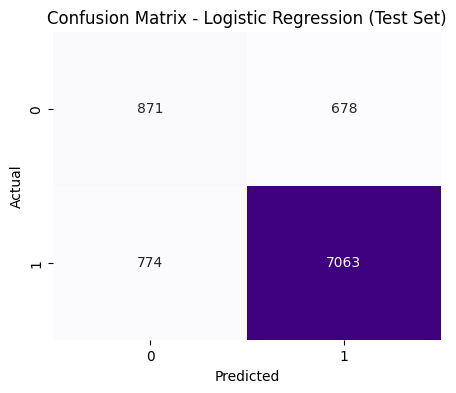


--- 🔹 Training and Evaluating Decision Tree ---
Accuracy         : 0.8008
Precision (Macro): 0.6776
Recall (Macro)   : 0.7416
F1-Score (Macro) : 0.6970
ROC-AUC          : 0.7416

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.4316    0.6533    0.5198      1549
           1     0.9237    0.8299    0.8743      7837

    accuracy                         0.8008      9386
   macro avg     0.6776    0.7416    0.6970      9386
weighted avg     0.8425    0.8008    0.8158      9386



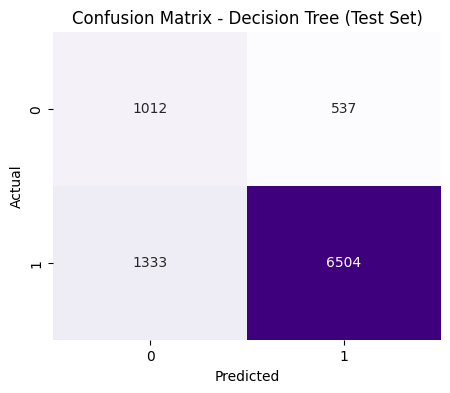


--- 🔹 Training and Evaluating Random Forest ---
Accuracy         : 0.8556
Precision (Macro): 0.7422
Recall (Macro)   : 0.7851
F1-Score (Macro) : 0.7600
ROC-AUC          : 0.8787

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.5507    0.6798    0.6085      1549
           1     0.9336    0.8904    0.9115      7837

    accuracy                         0.8556      9386
   macro avg     0.7422    0.7851    0.7600      9386
weighted avg     0.8704    0.8556    0.8615      9386



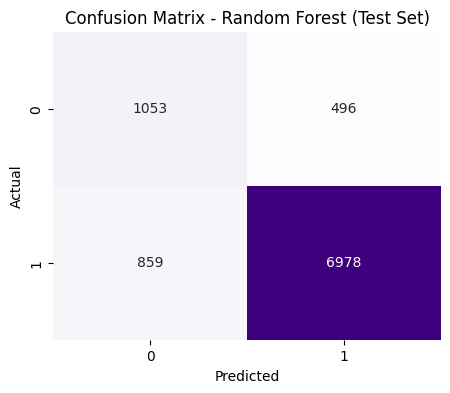


--- 🔹 Training and Evaluating K-Nearest Neighbors ---
Accuracy         : 0.8144
Precision (Macro): 0.6872
Recall (Macro)   : 0.7381
F1-Score (Macro) : 0.7054
ROC-AUC          : 0.7951

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.4546    0.6243    0.5261      1549
           1     0.9198    0.8520    0.8846      7837

    accuracy                         0.8144      9386
   macro avg     0.6872    0.7381    0.7054      9386
weighted avg     0.8431    0.8144    0.8254      9386



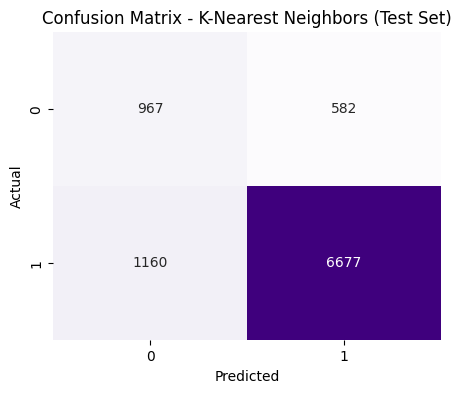


--- 🔹 Training and Evaluating Gaussian Naive Bayes ---
Accuracy         : 0.8080
Precision (Macro): 0.6806
Recall (Macro)   : 0.7340
F1-Score (Macro) : 0.6988
ROC-AUC          : 0.8250

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.4421    0.6236    0.5174      1549
           1     0.9190    0.8445    0.8802      7837

    accuracy                         0.8080      9386
   macro avg     0.6806    0.7340    0.6988      9386
weighted avg     0.8403    0.8080    0.8203      9386



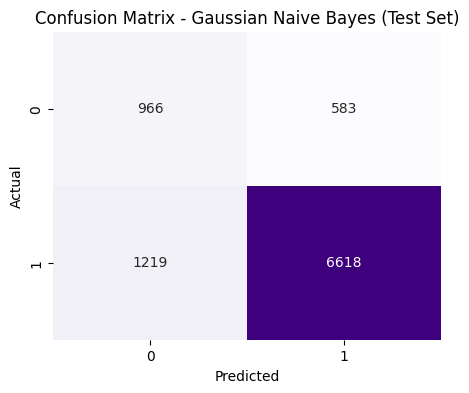


📊 Summary of Baseline Model Results (Macro Metrics, Test Set):


Accuracy  Precision (Macro)  Recall (Macro)  \
Random Forest         0.855636           0.742184        0.785093   
Logistic Regression   0.845302           0.720949        0.731768   
Gaussian Naive Bayes  0.808012           0.680572        0.734042   
K-Nearest Neighbors   0.814404           0.687227        0.738129   
Decision Tree         0.800767           0.677644        0.741617   

                      F1-Score (Macro)   ROC-AUC  
Random Forest                 0.759998  0.878708  
Logistic Regression           0.726095  0.843701  
Gaussian Naive Bayes          0.698789  0.825015  
K-Nearest Neighbors           0.705360  0.795113  
Decision Tree                 0.697043  0.741617

/tmp/ipython-input-3523641059.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['F1-Score (Macro)'], palette="viridis")


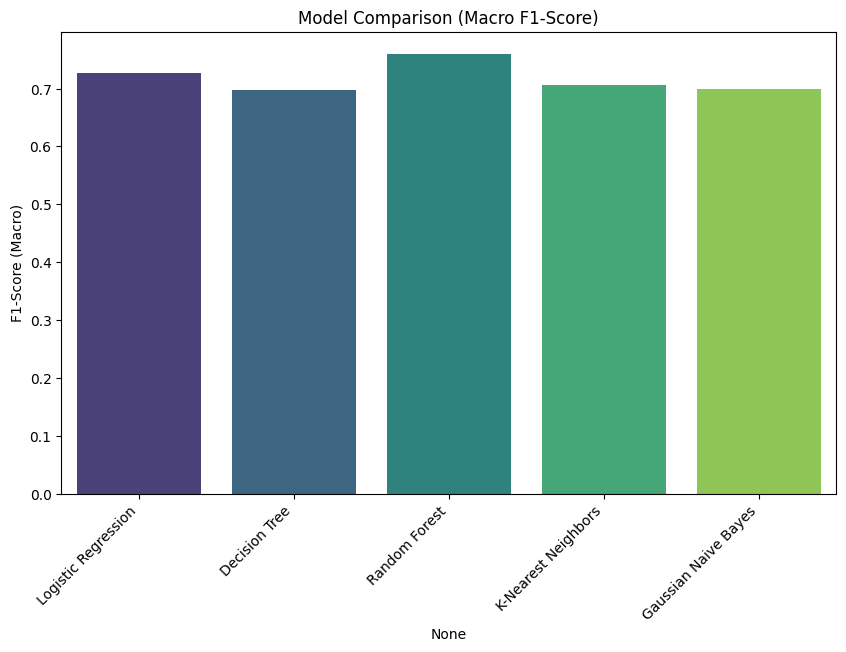

In [ ]:
# ==========================================
# 🔹 BASELINE MODEL EVALUATION (macro metrics + safe for XGBoost)
# ==========================================

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === 1️⃣ Define Baseline Models ===
baseline_models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

results = {}
print("🚀 Evaluating Baseline Models with Macro Metrics...\n")

# Avoid column names with invalid characters
X_train_safe = X_train_resampled_ENN.copy()
X_test_safe = X_test.copy()
X_train_safe.columns = [f"f{i}" for i in range(X_train_safe.shape[1])]
X_test_safe.columns = X_train_safe.columns

# === 3️⃣ Loop through Models ===
for name, model in baseline_models.items():
    print(f"\n--- 🔹 Training and Evaluating {name} ---")

    # Use safe versions for XGBoost and CatBoost only
    if name in ["XGBoost", "CatBoost"]:
        X_train_use, X_test_use = X_train_safe, X_test_safe
    else:
        X_train_use, X_test_use = X_train_resampled_ENN, X_test

    # Train the model
    model.fit(X_train_use, y_train_resampled_ENN)

    # Predict
    y_pred = model.predict(X_test_use)
    y_proba = model.predict_proba(X_test_use)[:, 1]

    # Macro metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_proba)

    # Save metrics
    results[name] = {
        'Accuracy': acc,
        'Precision (Macro)': prec,
        'Recall (Macro)': rec,
        'F1-Score (Macro)': f1,
        'ROC-AUC': auc
    }

    # Display metrics
    print(f"Accuracy         : {acc:.4f}")
    print(f"Precision (Macro): {prec:.4f}")
    print(f"Recall (Macro)   : {rec:.4f}")
    print(f"F1-Score (Macro) : {f1:.4f}")
    print(f"ROC-AUC          : {auc:.4f}")

    # Classification Report
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
    plt.title(f"Confusion Matrix - {name} (Test Set)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# === 4️⃣ Summary Table of All Models ===
print("\n📊 Summary of Baseline Model Results (Macro Metrics, Test Set):")
results_df = pd.DataFrame(results).T
display(results_df.sort_values(by='ROC-AUC', ascending=False))

# Optional Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index, y=results_df['F1-Score (Macro)'], palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Model Comparison (Macro F1-Score)")
plt.ylabel("F1-Score (Macro)")
plt.show()


In [ ]:
import numpy as np
import scipy.stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 🛠️ 1. FUNGSI DELONG TEST (Tambahkan ini)
# ==========================================
def compute_midrank(x):
    """Helper function untuk menghitung midrank"""
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5 * (i + j - 1)
        i = j
    T2 = np.empty(N, dtype=float)
    T2[J] = T + 1
    return T2

def fastDeLong(predictions_sorted_transposed, label_1_count):
    """Algoritma Fast DeLong"""
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=float)
    ty = np.empty([k, n], dtype=float)
    tz = np.empty([k, m + n], dtype=float)

    for r in range(k):
        tx[r, :] = compute_midrank(positive_examples[r, :])
        ty[r, :] = compute_midrank(negative_examples[r, :])
        tz[r, :] = compute_midrank(predictions_sorted_transposed[r, :])

    aucs = tz[:, :m].sum(axis=1) / m / n - float(m + 1.0) / 2.0 / n
    v01 = (tz[:, :m] - tx[:, :]) / n
    v10 = 1.0 - (tz[:, m:] - ty[:, :]) / m
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov

def delong_roc_test(ground_truth, predictions_one, predictions_two):
    """
    Menghitung p-value menggunakan DeLong test untuk membandingkan dua model.
    ground_truth: array label asli (y_test)
    predictions_one: probabilitas dari model 1
    predictions_two: probabilitas dari model 2
    """
    ground_truth = np.array(ground_truth).flatten()
    predictions_one = np.array(predictions_one).flatten()
    predictions_two = np.array(predictions_two).flatten()

    order = np.argsort(-ground_truth)
    label_1_count = int(ground_truth.sum())
    predictions_sorted_transposed = np.vstack((predictions_one, predictions_two))[:, order]

    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count)

    l = np.array([[1, -1]])
    z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, delongcov), l.T))
    p_value = 2 * scipy.stats.norm.sf(np.abs(z)) # two-tailed p-value

    return p_value[0][0]

# ==========================================
# 🏁 2. PERSIAPAN MODEL & EVALUASI
# ==========================================

# Pastikan TabNet (Model Utama) sudah dilatih sebelumnya dan kita punya probabilitasnya
# Asumsi: final_model_tuned adalah model TabNet Anda yang sudah di-fit
print("🤖 Getting TabNet Predictions...")
# Ganti 'final_model_tuned' dengan nama variabel model TabNet Anda
y_proba_tabnet = final_model.predict_proba(X_test.values)[:, 1]

baseline_models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

results = {}
# Dictionary untuk menyimpan probabilitas semua model baseline
baseline_probas = {}

# Menyiapkan data aman untuk XGBoost/LGBM (menghindari error karakter di nama kolom)
X_train_safe = X_train_resampled_ENN.copy()
X_test_safe = X_test.copy()
X_train_safe.columns = [f"f{i}" for i in range(X_train_safe.shape[1])]
X_test_safe.columns = [f"f{i}" for i in range(X_test_safe.shape[1])]

print("\n🚀 Evaluating Baseline Models...\n")

for name, model in baseline_models.items():
    print(f"--- 🔹 Training {name} ---")

    if name in ["XGBoost", "LightGBM"]:
        X_train_use, X_test_use = X_train_safe, X_test_safe
    else:
        X_train_use, X_test_use = X_train_resampled_ENN, X_test

    # Train
    model.fit(X_train_use, y_train_resampled_ENN)

    # Predict
    y_pred = model.predict(X_test_use)
    y_proba = model.predict_proba(X_test_use)[:, 1]

    # Simpan probabilitas untuk DeLong test nanti
    baseline_probas[name] = y_proba

    # Hitung Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        'Accuracy': acc, 'Precision (Macro)': prec,
        'Recall (Macro)': rec, 'F1-Score (Macro)': f1, 'ROC-AUC': auc
    }
    print(f"✅ {name} AUC: {auc:.4f}")

# ==========================================
# 📊 3. ANALISIS STATISTIK (DELONG TEST)
# ==========================================
print("\n⚖️  Statistical Significance Test (DeLong Test) vs TabNet")
print("H0: Tidak ada perbedaan signifikan antara AUC TabNet dan Baseline")
print("H1: Ada perbedaan signifikan (p-value < 0.05)\n")

delong_results = []

for name, base_proba in baseline_probas.items():
    # Hitung p-value antara TabNet vs Model Baseline
    p_val = delong_roc_test(y_test, y_proba_tabnet, base_proba)

    significance = "SIGNIFICANT" if p_val < 0.05 else "Not Significant"
    delong_results.append({
        "Model Comparison": f"TabNet vs {name}",
        "p-value": p_val,
        "Result": significance
    })

    print(f"TabNet vs {name:20s} : p-value = {p_val:.4f} ({significance})")

# Tampilkan Tabel Akhir
print("\n📊 Final Leaderboard with Statistical Test:")
results_df = pd.DataFrame(results).T
results_df['p-value (vs TabNet)'] = [d['p-value'] for d in delong_results]
display(results_df.sort_values(by='ROC-AUC', ascending=False))